<a href="https://colab.research.google.com/github/SamTremblay18/Hockey-Shot-Classification/blob/main/CNN_Method1_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method 1 - Reframe to 576 frames and All Sensors Configuration

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from google.colab import drive 
drive.mount('/content/drive')
import pickle
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers 
from keras import models
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

Mounted at /content/drive


In [2]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  P = pickle.load(f)
  f.close()

  return P

In [3]:
X_train_all = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train_all1.pickle')
y_train_all = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train_all1.pickle')

In [4]:
X_test1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_test1.pickle')
X_train1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train1_1.pickle')
y_test1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_test1.pickle')
y_train1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train1_1.pickle')
X_valid1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid1_1.pickle')
y_valid1 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid1_1.pickle')

In [5]:
X_train2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train1_2.pickle')
y_train2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train1_2.pickle')
X_valid2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid1_2.pickle')
y_valid2 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid1_2.pickle')

In [6]:
X_train3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train1_3.pickle')
y_train3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train1_3.pickle')
X_valid3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid1_3.pickle')
y_valid3 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid1_3.pickle')

In [7]:
X_train4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train1_4.pickle')
y_train4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train1_4.pickle')
X_valid4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid1_4.pickle')
y_valid4 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid1_4.pickle')

In [8]:
X_train5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train1_5.pickle')
y_train5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train1_5.pickle')
X_valid5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_valid1_5.pickle')
y_valid5 = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_valid1_5.pickle')

# Model based on Hfawaz https://keras.io/examples/timeseries/timeseries_classification_from_scratch/ 

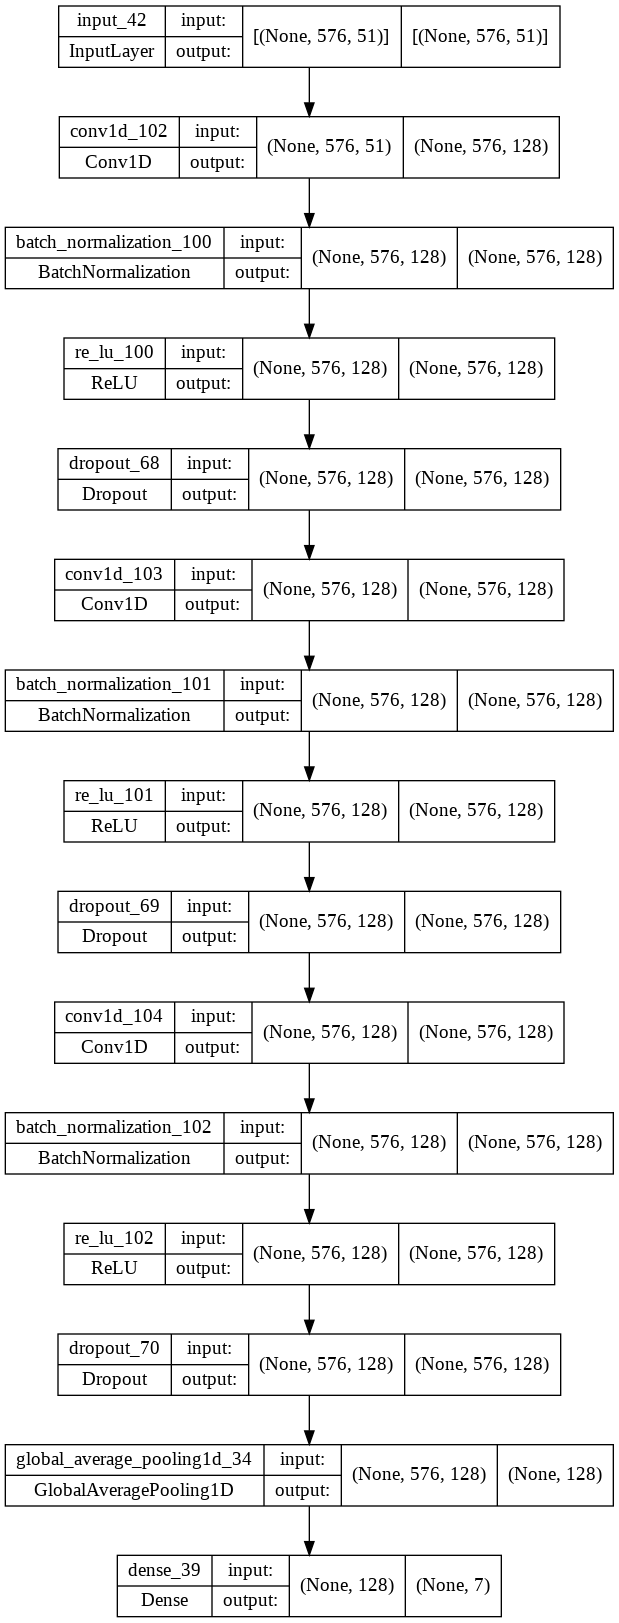

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model27.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 14ms/step - loss: 4.8954 - sparse_categorical_accuracy: 0.6265 - val_loss: 3.7489 - val_sparse_categorical_accuracy: 0.3220 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 10ms/step - loss: 1.8059 - sparse_categorical_accuracy: 0.8436 - val_loss: 3.0449 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 10ms/step - loss: 0.9971 - sparse_categorical_accuracy: 0.8687 - val_loss: 2.8710 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 10ms/step - loss: 0.8427 - sparse_categorical_accuracy: 0.8853 - val_loss: 2.4742 - val_sparse_categorical_accuracy: 0.2008 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 11ms/step - loss: 0.7557 - sparse_categorical_accuracy: 0.8962 - val_loss: 1.8934 - val_sparse_categorical_accuracy: 0.2348 - lr: 0.0010
Epoch 6/500
66/66 [================

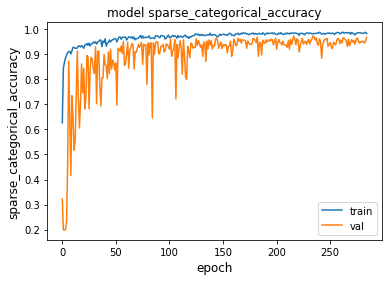

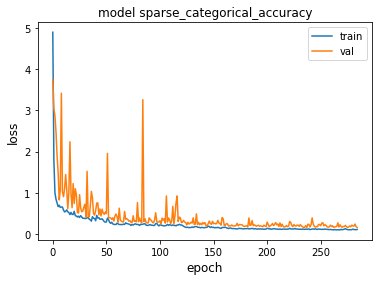

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# KerasTuner

## dataset 1

In [ ]:
pip install keras-tuner

In [ ]:
import kerastuner as kt

In [ ]:
def build_model2(hp):
  input_layer = keras.layers.Input(X_train1.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 64, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 5),
          kernel_regularizer = hp.Choice('regularizers1', ['L1', 'L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 64, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 5),
          kernel_regularizer = hp.Choice('regularizers2', ['L1', 'L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 64, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 5),
          kernel_regularizer = hp.Choice('regularizers3', ['L1', 'L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=20, verbose=1)]


In [ ]:
tuner = kt.RandomSearch(
    hypermodel = build_model2,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 100,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'all_sensors_tuner2',
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
filters1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 1, 'sampling': None}
regularizers1 (Choice)
{'default': 'L1', 'conditions': [], 'values': ['L1', 'L2', 'l1_l2'], 'ordered': False}
dropout1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters2 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size2 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 1, 'sampling': None}
regularizers2 (Choice)
{'default': 'L1', 'conditions': [], 'values': ['L1', 'L2', 'l1_l2'], 'ordered': False}
dropout2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters3 (Int)
{'default': 

In [ ]:
tuner.search(X_train1, 
             y_train1, 
             epochs=250, 
             validation_data=(X_valid1, y_valid1),
             callbacks=callbacks)

Trial 100 Complete [00h 01m 24s]
val_sparse_categorical_accuracy: 0.9032257795333862

Best val_sparse_categorical_accuracy So Far: 0.9501466155052185
Total elapsed time: 01h 35m 13s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in random_search/all_sensors_tuner2
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 3
regularizers1: L2
dropout1: 0.30000000000000004
filters2: 128
kernel_size2: 3
regularizers2: l1_l2
dropout2: 0.30000000000000004
filters3: 128
kernel_size3: 5
regularizers3: L2
dropout3: 0.5
optimizer: sgd
Score: 0.9501466155052185
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 5
regularizers1: L2
dropout1: 0.1
filters2: 64
kernel_size2: 5
regularizers2: L2
dropout2: 0.4
filters3: 128
kernel_size3: 3
regularizers3: L2
dropout3: 0.2
optimizer: rmsprop
Score: 0.9472140669822693
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.0
filters2: 192
kernel_size2: 3
regularizers2: l1_l2
dropout2: 0.4
filters3: 192
kernel_size3: 4
regularizers3: L2
dropout3: 0.5
optimizer: sgd
Score: 0.9472140669822693
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.4
fil

In [ ]:
def build_model3(hp):
  input_layer = keras.layers.Input(X_train1.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 4),
          kernel_regularizer = hp.Choice('regularizers1', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0.3, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 4),
          kernel_regularizer = hp.Choice('regularizers2', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0.3, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 4),
          kernel_regularizer = hp.Choice('regularizers3', ['L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0.3, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, verbose=1)]


In [ ]:
tuner = kt.RandomSearch(
    hypermodel = build_model3,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 100,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'all_sensors_tuner3',
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
filters1 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 4, 'step': 1, 'sampling': None}
regularizers1 (Choice)
{'default': 'L2', 'conditions': [], 'values': ['L2', 'l1_l2'], 'ordered': False}
dropout1 (Float)
{'default': 0.3, 'conditions': [], 'min_value': 0.3, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters2 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 64, 'sampling': None}
kernel_size2 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 4, 'step': 1, 'sampling': None}
regularizers2 (Choice)
{'default': 'L2', 'conditions': [], 'values': ['L2', 'l1_l2'], 'ordered': False}
dropout2 (Float)
{'default': 0.3, 'conditions': [], 'min_value': 0.3, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
filters3 (Int)
{'default': None, 'con

In [ ]:
tuner.search(X_train1, 
             y_train1, 
             epochs=200, 
             validation_data=(X_valid1, y_valid1),
             callbacks=callbacks)

Trial 100 Complete [00h 02m 04s]
val_sparse_categorical_accuracy: 0.9501466155052185

Best val_sparse_categorical_accuracy So Far: 0.973607063293457
Total elapsed time: 03h 42m 14s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in random_search/all_sensors_tuner3
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.4
filters2: 192
kernel_size2: 3
regularizers2: l1_l2
dropout2: 0.5
filters3: 256
kernel_size3: 4
regularizers3: L2
dropout3: 0.3
optimizer: adam
Score: 0.973607063293457
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: l1_l2
dropout1: 0.4
filters2: 192
kernel_size2: 3
regularizers2: L2
dropout2: 0.5
filters3: 128
kernel_size3: 3
regularizers3: L2
dropout3: 0.3
optimizer: adam
Score: 0.9706745147705078
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.5
filters2: 192
kernel_size2: 3
regularizers2: l1_l2
dropout2: 0.4
filters3: 256
kernel_size3: 4
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9677419066429138
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.5
filters2: 128
kernel_size2: 3


## dataset 2

In [9]:
def build_model3(hp):
  input_layer = keras.layers.Input(X_train2.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 4),
          kernel_regularizer = hp.Choice('regularizers1', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0.3, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 4),
          kernel_regularizer = hp.Choice('regularizers2', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0.3, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 4),
          kernel_regularizer = hp.Choice('regularizers3', ['L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0.3, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, verbose=1)]


In [10]:
tuner = kt.RandomSearch(
    hypermodel = build_model3,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'all_sensors_tuner4',
)

In [11]:
tuner.search(X_train2, 
             y_train2, 
             epochs=150, 
             validation_data=(X_valid2, y_valid2),
             callbacks=callbacks)

Trial 50 Complete [00h 01m 39s]
val_sparse_categorical_accuracy: 0.9411764740943909

Best val_sparse_categorical_accuracy So Far: 0.9852941036224365
Total elapsed time: 01h 22m 26s
INFO:tensorflow:Oracle triggered exit


In [12]:
tuner.results_summary()

Results summary
Results in random_search/all_sensors_tuner4
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: L2
dropout1: 0.4
filters2: 192
kernel_size2: 4
regularizers2: L2
dropout2: 0.4
filters3: 192
kernel_size3: 3
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9852941036224365
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 4
regularizers1: L2
dropout1: 0.3
filters2: 256
kernel_size2: 3
regularizers2: L2
dropout2: 0.3
filters3: 256
kernel_size3: 3
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9823529124259949
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 3
regularizers1: L2
dropout1: 0.3
filters2: 256
kernel_size2: 3
regularizers2: L2
dropout2: 0.4
filters3: 128
kernel_size3: 4
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9823529124259949
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 3
regularizers1: L2
dropout1: 0.3
filters2: 256
kernel_size2: 4
regularizers2: L2

## dataset 3

In [13]:
def build_model3(hp):
  input_layer = keras.layers.Input(X_train3.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 4),
          kernel_regularizer = hp.Choice('regularizers1', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0.3, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 4),
          kernel_regularizer = hp.Choice('regularizers2', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0.3, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 4),
          kernel_regularizer = hp.Choice('regularizers3', ['L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0.3, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, verbose=1)]


In [14]:
tuner = kt.RandomSearch(
    hypermodel = build_model3,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'all_sensors_tuner5',
)

In [15]:
tuner.search(X_train3, 
             y_train3, 
             epochs=150, 
             validation_data=(X_valid3, y_valid3),
             callbacks=callbacks)

Trial 50 Complete [00h 01m 57s]
val_sparse_categorical_accuracy: 0.9411764740943909

Best val_sparse_categorical_accuracy So Far: 0.970588207244873
Total elapsed time: 01h 24m 12s
INFO:tensorflow:Oracle triggered exit


In [16]:
tuner.results_summary()

Results summary
Results in random_search/all_sensors_tuner5
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: L2
dropout1: 0.4
filters2: 192
kernel_size2: 4
regularizers2: l1_l2
dropout2: 0.3
filters3: 192
kernel_size3: 4
regularizers3: L2
dropout3: 0.5
optimizer: adam
Score: 0.970588207244873
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 3
regularizers1: l1_l2
dropout1: 0.4
filters2: 192
kernel_size2: 3
regularizers2: l1_l2
dropout2: 0.4
filters3: 256
kernel_size3: 4
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9647058844566345
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: L2
dropout1: 0.4
filters2: 192
kernel_size2: 3
regularizers2: L2
dropout2: 0.4
filters3: 128
kernel_size3: 3
regularizers3: L2
dropout3: 0.3
optimizer: adam
Score: 0.9617646932601929
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 3
regularizers1: L2
dropout1: 0.4
filters2: 192
kernel_size2: 3
regulariz

##dataset 4

In [17]:
def build_model3(hp):
  input_layer = keras.layers.Input(X_train4.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 4),
          kernel_regularizer = hp.Choice('regularizers1', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0.3, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 4),
          kernel_regularizer = hp.Choice('regularizers2', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0.3, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 4),
          kernel_regularizer = hp.Choice('regularizers3', ['L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0.3, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, verbose=1)]


In [18]:
tuner = kt.RandomSearch(
    hypermodel = build_model3,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'all_sensors_tuner6',
)

In [19]:
tuner.search(X_train4, 
             y_train4, 
             epochs=150, 
             validation_data=(X_valid4, y_valid4),
             callbacks=callbacks)

Trial 50 Complete [00h 01m 38s]
val_sparse_categorical_accuracy: 0.9149560332298279

Best val_sparse_categorical_accuracy So Far: 0.9648093581199646
Total elapsed time: 01h 21m 05s
INFO:tensorflow:Oracle triggered exit


In [20]:
tuner.results_summary()

Results summary
Results in random_search/all_sensors_tuner6
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: L2
dropout1: 0.5
filters2: 192
kernel_size2: 4
regularizers2: l1_l2
dropout2: 0.4
filters3: 192
kernel_size3: 4
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9648093581199646
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: L2
dropout1: 0.5
filters2: 192
kernel_size2: 3
regularizers2: l1_l2
dropout2: 0.3
filters3: 256
kernel_size3: 4
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9618768095970154
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 3
regularizers1: L2
dropout1: 0.3
filters2: 192
kernel_size2: 4
regularizers2: L2
dropout2: 0.4
filters3: 192
kernel_size3: 4
regularizers3: L2
dropout3: 0.5
optimizer: adam
Score: 0.9589442610740662
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 4
regularizers1: L2
dropout1: 0.4
filters2: 192
kernel_size2: 3
regularizer

##dataset 5

In [21]:
def build_model3(hp):
  input_layer = keras.layers.Input(X_train5.shape[1:])

  conv1 = keras.layers.Conv1D(
          filters = hp.Int('filters1', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size1', 3, 4),
          kernel_regularizer = hp.Choice('regularizers1', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)
  conv1 = keras.layers.Dropout(
          rate = hp.Float('dropout1', 0.3, 0.5, step=0.1))(conv1)

  conv2 = keras.layers.Conv1D(          
          filters = hp.Int('filters2', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size2', 3, 4),
          kernel_regularizer = hp.Choice('regularizers2', ['L2', 'l1_l2']),
          padding = 'same')(input_layer)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv1)
  conv2 = keras.layers.Dropout(
          rate = hp.Float('dropout2', 0.3, 0.5,step=0.1))(conv2)

  conv3 = keras.layers.Conv1D(
          filters = hp.Int('filters3', 128, 256, step=64),
          kernel_size = hp.Int('kernel_size3', 3, 4),
          kernel_regularizer = hp.Choice('regularizers3', ['L2', 'l1_l2']),
          padding = 'same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)
  conv3 = keras.layers.Dropout(
          rate = hp.Float('dropout3', 0.3, 0.5, step=0.1))(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  model = keras.Model(input_layer, output_layer)

  optimizer = hp.Choice('optimizer', ['adam', 'sgd'])

  model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

  return model

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, verbose=1)]


In [22]:
tuner = kt.RandomSearch(
    hypermodel = build_model3,
    objective = 'val_sparse_categorical_accuracy',
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = 'random_search',
    project_name = 'all_sensors_tuner7',
)

In [23]:
tuner.search(X_train5, 
             y_train5, 
             epochs=150, 
             validation_data=(X_valid5, y_valid5),
             callbacks=callbacks)

Trial 50 Complete [00h 01m 37s]
val_sparse_categorical_accuracy: 0.8352941274642944

Best val_sparse_categorical_accuracy So Far: 0.9588235020637512
Total elapsed time: 01h 23m 39s
INFO:tensorflow:Oracle triggered exit


In [24]:
tuner.results_summary()

Results summary
Results in random_search/all_sensors_tuner7
Showing 10 best trials
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 4
regularizers1: L2
dropout1: 0.3
filters2: 256
kernel_size2: 3
regularizers2: l1_l2
dropout2: 0.4
filters3: 192
kernel_size3: 3
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9588235020637512
Trial summary
Hyperparameters:
filters1: 256
kernel_size1: 4
regularizers1: L2
dropout1: 0.4
filters2: 128
kernel_size2: 4
regularizers2: L2
dropout2: 0.5
filters3: 192
kernel_size3: 3
regularizers3: L2
dropout3: 0.5
optimizer: adam
Score: 0.9588235020637512
Trial summary
Hyperparameters:
filters1: 192
kernel_size1: 3
regularizers1: L2
dropout1: 0.4
filters2: 128
kernel_size2: 3
regularizers2: L2
dropout2: 0.4
filters3: 192
kernel_size3: 4
regularizers3: L2
dropout3: 0.4
optimizer: adam
Score: 0.9558823704719543
Trial summary
Hyperparameters:
filters1: 128
kernel_size1: 4
regularizers1: L2
dropout1: 0.3
filters2: 192
kernel_size2: 4
regularizers2:

#Cross-validation on tuned model

##FOLD 1

In [12]:
acc_per_fold = []
loss_per_fold = []

In [9]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=192, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.4)(conv1)

    conv2 = keras.layers.Conv1D(filters=192, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.4)(conv2)

    conv3 = keras.layers.Conv1D(filters=256, kernel_size=4, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.4)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train1.shape[1:])

In [14]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model_fold1.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
history = model.fit(
    X_train1,
    y_train1,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid1,y_valid1),
    verbose=1,
)

Epoch 1/500
72/72 [==============================] - 3s 34ms/step - loss: 3.9841 - sparse_categorical_accuracy: 0.7511 - val_loss: 3.9014 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 2/500
72/72 [==============================] - 2s 29ms/step - loss: 1.2415 - sparse_categorical_accuracy: 0.8829 - val_loss: 4.1030 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 3/500
72/72 [==============================] - 2s 29ms/step - loss: 0.8843 - sparse_categorical_accuracy: 0.8877 - val_loss: 3.0294 - val_sparse_categorical_accuracy: 0.2118 - lr: 0.0010
Epoch 4/500
72/72 [==============================] - 2s 30ms/step - loss: 0.7989 - sparse_categorical_accuracy: 0.8934 - val_loss: 1.9616 - val_sparse_categorical_accuracy: 0.4735 - lr: 0.0010
Epoch 5/500
72/72 [==============================] - 2s 29ms/step - loss: 0.6973 - sparse_categorical_accuracy: 0.9064 - val_loss: 1.6075 - val_sparse_categorical_accuracy: 0.4647 - lr: 0.0010
Epoch 6/500
72/72 [================

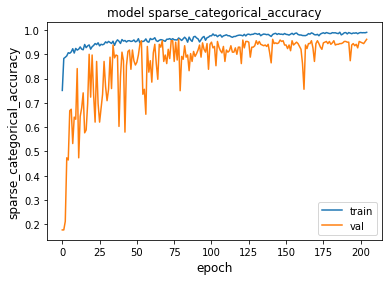

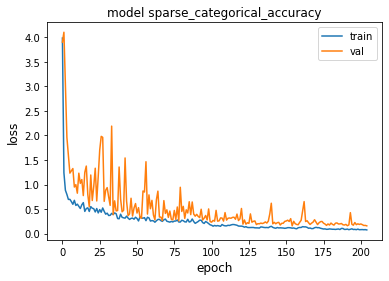

In [15]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [16]:
score1 = model.evaluate(X_valid1, y_valid1, verbose=0)
print(f'Score for fold 1: {model.metrics_names[0]} of {score1[0]}; {model.metrics_names[1]} of {score1[1]*100}%')
acc_per_fold.append(score1[1] * 100)
loss_per_fold.append(score1[0])

Score for fold 1: loss of 0.15857912600040436; sparse_categorical_accuracy of 96.17646932601929%


## FOLD 2

In [17]:
model = make_model(input_shape=X_train2.shape[1:])

In [18]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model_fold2.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train2,
    y_train2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid2,y_valid2),
    verbose=1,
)

Epoch 1/500
72/72 [==============================] - 3s 34ms/step - loss: 4.0148 - sparse_categorical_accuracy: 0.7511 - val_loss: 3.6903 - val_sparse_categorical_accuracy: 0.1971 - lr: 0.0010
Epoch 2/500
72/72 [==============================] - 2s 30ms/step - loss: 1.2673 - sparse_categorical_accuracy: 0.8799 - val_loss: 3.2347 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 3/500
72/72 [==============================] - 2s 29ms/step - loss: 0.8674 - sparse_categorical_accuracy: 0.8925 - val_loss: 4.0780 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 4/500
72/72 [==============================] - 2s 29ms/step - loss: 0.7535 - sparse_categorical_accuracy: 0.9051 - val_loss: 2.7931 - val_sparse_categorical_accuracy: 0.2794 - lr: 0.0010
Epoch 5/500
72/72 [==============================] - 2s 30ms/step - loss: 0.7439 - sparse_categorical_accuracy: 0.9051 - val_loss: 2.3362 - val_sparse_categorical_accuracy: 0.2588 - lr: 0.0010
Epoch 6/500
72/72 [================

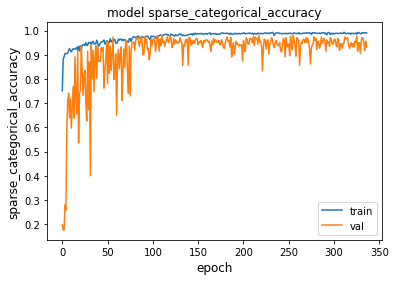

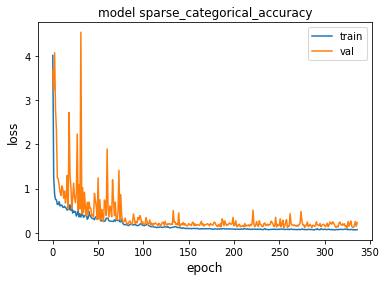

In [19]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [20]:
score2 = model.evaluate(X_valid2, y_valid2, verbose=0)
print(f'Score for fold 2: {model.metrics_names[0]} of {score2[0]}; {model.metrics_names[1]} of {score2[1]*100}%')
acc_per_fold.append(score2[1] * 100)
loss_per_fold.append(score2[0])

Score for fold 2: loss of 0.22672298550605774; sparse_categorical_accuracy of 93.23529601097107%


## FOLD 3

In [21]:
model = make_model(input_shape=X_train3.shape[1:])

In [22]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model_fold3.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train3,
    y_train3,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid3,y_valid3),
    verbose=1,
)

Epoch 1/500
72/72 [==============================] - 3s 34ms/step - loss: 4.0678 - sparse_categorical_accuracy: 0.7489 - val_loss: 3.8938 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 2/500
72/72 [==============================] - 2s 30ms/step - loss: 1.2898 - sparse_categorical_accuracy: 0.8655 - val_loss: 3.7944 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 3/500
72/72 [==============================] - 2s 29ms/step - loss: 0.8614 - sparse_categorical_accuracy: 0.9003 - val_loss: 4.1207 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 4/500
72/72 [==============================] - 2s 30ms/step - loss: 0.7892 - sparse_categorical_accuracy: 0.8986 - val_loss: 2.4873 - val_sparse_categorical_accuracy: 0.2559 - lr: 0.0010
Epoch 5/500
72/72 [==============================] - 2s 29ms/step - loss: 0.7161 - sparse_categorical_accuracy: 0.9034 - val_loss: 1.3979 - val_sparse_categorical_accuracy: 0.5882 - lr: 0.0010
Epoch 6/500
72/72 [================

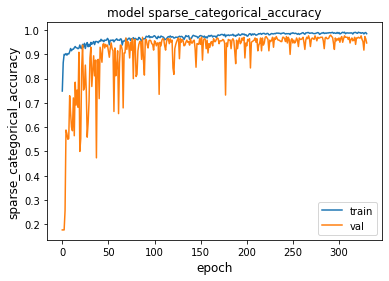

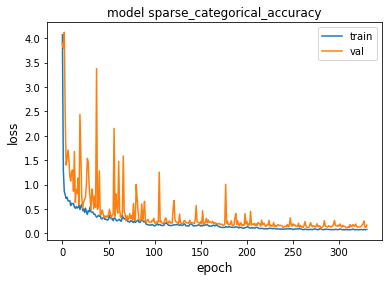

In [23]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [24]:
score3 = model.evaluate(X_valid3, y_valid3, verbose=0)
print(f'Score for fold 3: {model.metrics_names[0]} of {score3[0]}; {model.metrics_names[1]} of {score3[1]*100}%')
acc_per_fold.append(score3[1] * 100)
loss_per_fold.append(score3[0])

Score for fold 3: loss of 0.1694040596485138; sparse_categorical_accuracy of 94.70587968826294%


##FOLD 4

In [25]:
model = make_model(input_shape=X_train4.shape[1:])

In [26]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model_fold4.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train4,
    y_train4,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid4,y_valid4),
    verbose=1,
)

Epoch 1/500
72/72 [==============================] - 4s 36ms/step - loss: 4.0686 - sparse_categorical_accuracy: 0.7392 - val_loss: 3.4540 - val_sparse_categorical_accuracy: 0.3138 - lr: 0.0010
Epoch 2/500
72/72 [==============================] - 2s 29ms/step - loss: 1.3030 - sparse_categorical_accuracy: 0.8690 - val_loss: 4.1544 - val_sparse_categorical_accuracy: 0.1760 - lr: 0.0010
Epoch 3/500
72/72 [==============================] - 2s 29ms/step - loss: 0.9029 - sparse_categorical_accuracy: 0.8929 - val_loss: 3.2238 - val_sparse_categorical_accuracy: 0.1789 - lr: 0.0010
Epoch 4/500
72/72 [==============================] - 2s 29ms/step - loss: 0.8106 - sparse_categorical_accuracy: 0.8981 - val_loss: 1.8028 - val_sparse_categorical_accuracy: 0.3167 - lr: 0.0010
Epoch 5/500
72/72 [==============================] - 2s 29ms/step - loss: 0.7491 - sparse_categorical_accuracy: 0.8981 - val_loss: 1.4336 - val_sparse_categorical_accuracy: 0.5396 - lr: 0.0010
Epoch 6/500
72/72 [================

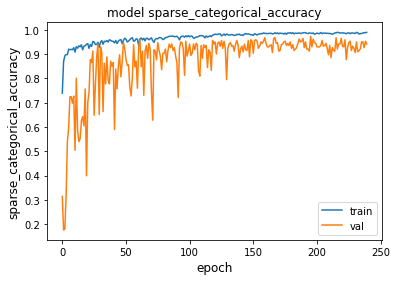

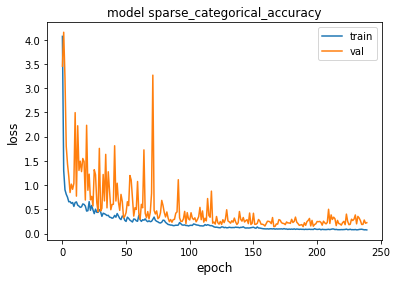

In [27]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [28]:
score4 = model.evaluate(X_valid4, y_valid4, verbose=0)
print(f'Score for fold 4: {model.metrics_names[0]} of {score4[0]}; {model.metrics_names[1]} of {score4[1]*100}%')
acc_per_fold.append(score4[1] * 100)
loss_per_fold.append(score4[0])

Score for fold 4: loss of 0.22386223077774048; sparse_categorical_accuracy of 94.13489699363708%


## FOLD 5

In [29]:
model = make_model(input_shape=X_train5.shape[1:])

In [30]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model_fold5.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train5,
    y_train5,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(X_valid5,y_valid5),
    verbose=1,
)

Epoch 1/500
72/72 [==============================] - 3s 33ms/step - loss: 4.0190 - sparse_categorical_accuracy: 0.7376 - val_loss: 4.2627 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 2/500
72/72 [==============================] - 2s 29ms/step - loss: 1.3481 - sparse_categorical_accuracy: 0.8734 - val_loss: 4.4672 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 3/500
72/72 [==============================] - 2s 29ms/step - loss: 0.8891 - sparse_categorical_accuracy: 0.8947 - val_loss: 3.1642 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 4/500
72/72 [==============================] - 2s 29ms/step - loss: 0.7644 - sparse_categorical_accuracy: 0.9121 - val_loss: 2.8196 - val_sparse_categorical_accuracy: 0.1765 - lr: 0.0010
Epoch 5/500
72/72 [==============================] - 2s 29ms/step - loss: 0.7145 - sparse_categorical_accuracy: 0.9086 - val_loss: 2.2543 - val_sparse_categorical_accuracy: 0.1941 - lr: 0.0010
Epoch 6/500
72/72 [================

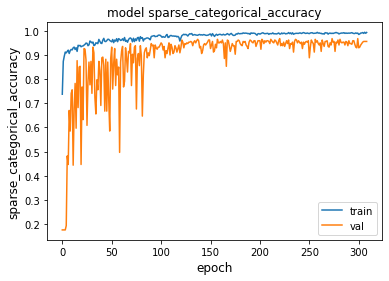

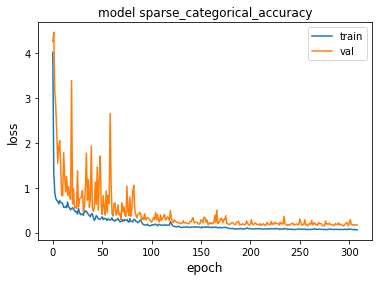

In [31]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [32]:
score5 = model.evaluate(X_valid5, y_valid5, verbose=0)
print(f'Score for fold 5: {model.metrics_names[0]} of {score5[0]}; {model.metrics_names[1]} of {score5[1]*100}%')
acc_per_fold.append(score5[1] * 100)
loss_per_fold.append(score5[0])

Score for fold 5: loss of 0.1666231006383896; sparse_categorical_accuracy of 95.58823704719543%


## total cross-validation Scores

In [33]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.15857912600040436 - Accuracy: 96.17646932601929%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.22672298550605774 - Accuracy: 93.23529601097107%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.1694040596485138 - Accuracy: 94.70587968826294%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.22386223077774048 - Accuracy: 94.13489699363708%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.1666231006383896 - Accuracy: 95.58823704719543%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 94.76815581321716 (+- 1.0402340508098726)
> Loss: 0.18903830051422119
------------------------

# Train on full dataset and evaluate on test set

In [11]:
model = make_model(input_shape=X_train_all.shape[1:])

epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model_train_all1.h5", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
history = model.fit(
    X_train_all,
    y_train_all,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/500
83/83 [==============================] - 14s 19ms/step - loss: 3.8306 - sparse_categorical_accuracy: 0.7202 - lr: 0.0010
Epoch 2/500
83/83 [==============================] - 2s 19ms/step - loss: 1.0998 - sparse_categorical_accuracy: 0.8768 - lr: 0.0010
Epoch 3/500
83/83 [==============================] - 2s 19ms/step - loss: 0.8344 - sparse_categorical_accuracy: 0.8992 - lr: 0.0010
Epoch 4/500
83/83 [==============================] - 2s 19ms/step - loss: 0.7433 - sparse_categorical_accuracy: 0.9007 - lr: 0.0010
Epoch 5/500
83/83 [==============================] - 2s 19ms/step - loss: 0.7114 - sparse_categorical_accuracy: 0.9049 - lr: 0.0010
Epoch 6/500
83/83 [==============================] - 2s 19ms/step - loss: 0.7094 - sparse_categorical_accuracy: 0.9090 - lr: 0.0010
Epoch 7/500
83/83 [==============================] - 2s 19ms/step - loss: 0.6561 - sparse_categorical_accuracy: 0.9124 - lr: 0.0010
Epoch 8/500
83/83 [==============================] - 2s 19ms/step - loss: 0

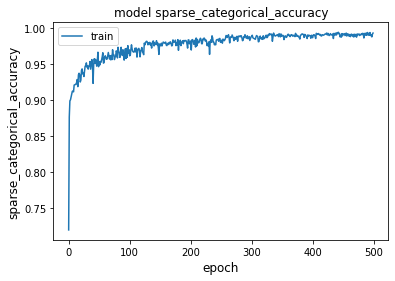

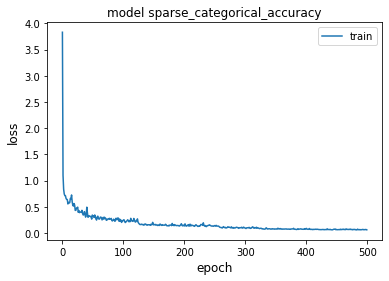

In [12]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train"], loc="best")
plt.show()
plt.close()

In [13]:
final_model = keras.models.load_model("model_train_all1.h5")

test_loss, test_acc = model.evaluate(X_test1, y_test1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

22/22 [==============================] - 1s 8ms/step - loss: 0.1106 - sparse_categorical_accuracy: 0.9706
Test accuracy 0.9706314206123352
Test loss 0.11061067879199982


In [49]:
labels = ['BH', 'OT', 'Other', 'Pass', 'Rest', 'SS', 'WS']

predict_X_test = model.predict(X_test1) 
y_pred = np.argmax(predict_X_test,axis=1)

print(classification_report(y_test1, y_pred, target_names=labels, digits=4))

              precision    recall  f1-score   support

          BH     1.0000    0.9875    0.9937        80
          OT     0.9875    0.9875    0.9875        80
       Other     0.9421    0.9500    0.9461       120
        Pass     1.0000    0.9000    0.9474        40
        Rest     0.9508    0.9667    0.9587       120
          SS     0.9915    0.9667    0.9789       120
          WS     0.9603    1.0000    0.9798       121

    accuracy                         0.9706       681
   macro avg     0.9760    0.9655    0.9703       681
weighted avg     0.9711    0.9706    0.9706       681



In [ ]:
confusion_matrix = confusion_matrix(y_test1, y_pred)

In [50]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

specificity = TN / (TN + FP)

print("Specificity BH:", specificity[0])
print("Specificity OT:", specificity[1])
print("Specificity Other:", specificity[2])
print("Specificity Pass:", specificity[3])
print("Specificity Rest:", specificity[4])
print("Specificity SS:", specificity[5])
print("Specificity WS:", specificity[6])

Specificity BH: 1.0
Specificity OT: 0.9983361064891847
Specificity Other: 0.9875222816399287
Specificity Pass: 1.0
Specificity Rest: 0.9893048128342246
Specificity SS: 0.9982174688057041
Specificity WS: 0.9910714285714286


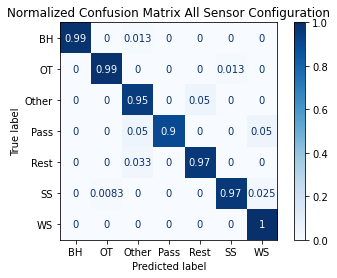

In [40]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test1,
                                              y_pred,
                                              display_labels=labels,
                                              normalize='true',
                                              cmap=plt.cm.Blues)
cmd.ax_.set_title("Normalized Confusion Matrix All Sensor Configuration")
plt.show()

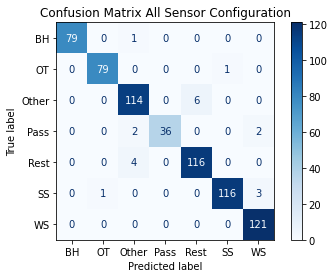

In [41]:
cmd = ConfusionMatrixDisplay.from_predictions(y_test1,
                                              y_pred,
                                              display_labels=labels,
                                              cmap=plt.cm.Blues)
cmd.ax_.set_title("Confusion Matrix All Sensor Configuration")
plt.show()

# Testing different models/hyperparamaters

## CNN model from Gab's first model

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu', input_shape=(X_train.shape[1:]),padding='same')) 
model.add(layers.MaxPooling1D(pool_size = 2))
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu',padding='same'))
model.add(layers.Conv1D(filters = 32, kernel_size = 9, activation='relu',padding='same'))
model.add(layers.Flatten()) 
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(7, activation='softmax')) 
model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data = (X_valid, y_valid))

Epoch 1/30
18/18 [==============================] - 11s 24ms/step - loss: 1.3887 - accuracy: 0.4985 - val_loss: 0.8260 - val_accuracy: 0.7176
Epoch 2/30
18/18 [==============================] - 0s 10ms/step - loss: 0.6325 - accuracy: 0.7527 - val_loss: 0.5595 - val_accuracy: 0.7735
Epoch 3/30
18/18 [==============================] - 0s 10ms/step - loss: 0.4559 - accuracy: 0.8250 - val_loss: 0.5277 - val_accuracy: 0.7735
Epoch 4/30
18/18 [==============================] - 0s 10ms/step - loss: 0.3852 - accuracy: 0.8585 - val_loss: 0.4917 - val_accuracy: 0.7912
Epoch 5/30
18/18 [==============================] - 0s 10ms/step - loss: 0.2888 - accuracy: 0.8968 - val_loss: 0.3692 - val_accuracy: 0.8412
Epoch 6/30
18/18 [==============================] - 0s 10ms/step - loss: 0.2395 - accuracy: 0.9177 - val_loss: 0.3942 - val_accuracy: 0.8441
Epoch 7/30
18/18 [==============================] - 0s 11ms/step - loss: 0.2198 - accuracy: 0.9164 - val_loss: 0.2909 - val_accuracy: 0.8941
Epoch 8/30
1

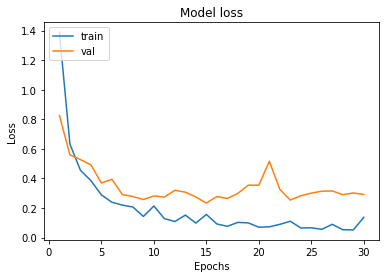

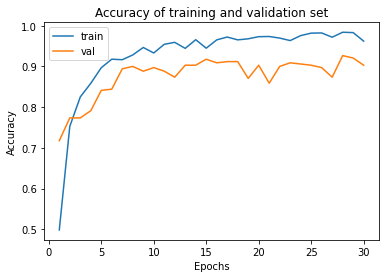

In [ ]:
#plot train/validation loss and train/validation accuracy 
history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Chollet basic CNN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', input_shape=(X_train.shape[1:]))) 
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(7))
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
history = model.fit(X_train, y_train,epochs=10, batch_size=128, validation_data = (X_valid, y_valid))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 570, 32)           11456     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 114, 32)          0         
 1D)                                                             
                                                                 
 conv1d_17 (Conv1D)          (None, 108, 32)           7200      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 7)                 231       
                                                                 
Total params: 18,887
Trainable params: 18,887
Non-trai

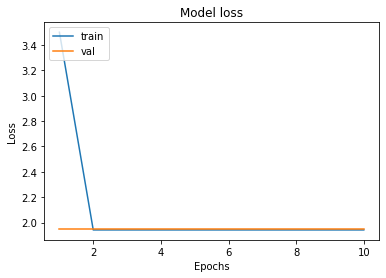

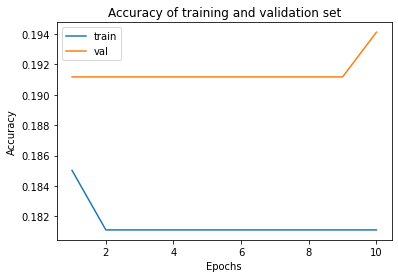

In [ ]:
#plot train/validation loss and train/validation accuracy 
history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Chollet's CNN, adding softmax activation 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 570, 32)           11456     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 114, 32)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 108, 32)           7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 18,887
Trainable params: 18,887
Non-trai

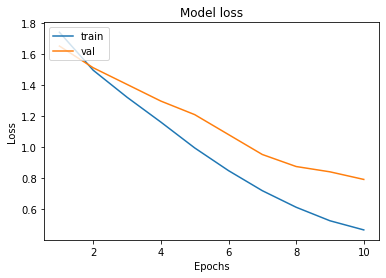

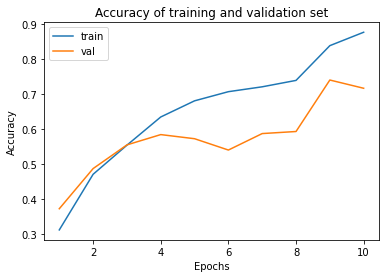

In [ ]:
model = Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', input_shape=(X_train.shape[1:]))) 
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(7, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
history = model.fit(X_train, y_train,epochs=10, batch_size=128, validation_data = (X_valid, y_valid))

history_dict = history.history
loss_values=history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

accuracy_values = history_dict['accuracy']
val_accuracy= history_dict['val_accuracy']
plt.plot(epochs, accuracy_values)
plt.plot(epochs, val_accuracy)
plt.title('Accuracy of training and validation set') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 1- CNN from scratch by hfawaz (keras)

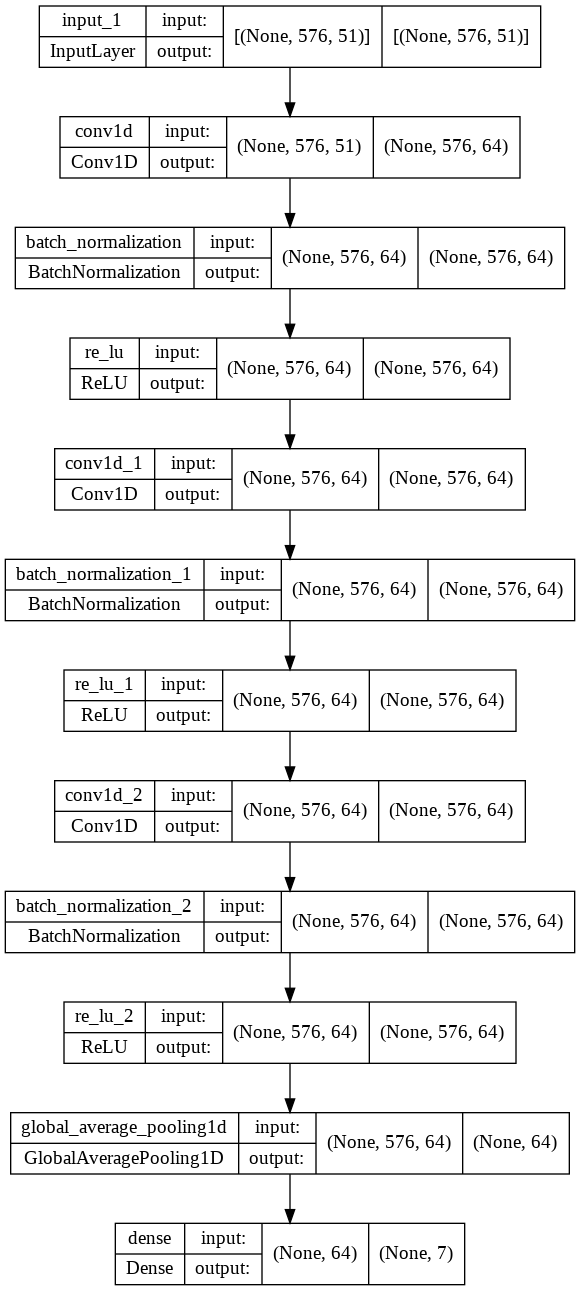

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 12s 12ms/step - loss: 1.2183 - sparse_categorical_accuracy: 0.6341 - val_loss: 1.3562 - val_sparse_categorical_accuracy: 0.5398 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 0.7347 - sparse_categorical_accuracy: 0.8280 - val_loss: 0.9415 - val_sparse_categorical_accuracy: 0.7140 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 7ms/step - loss: 0.5402 - sparse_categorical_accuracy: 0.8611 - val_loss: 0.5855 - val_sparse_categorical_accuracy: 0.8674 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.4216 - sparse_categorical_accuracy: 0.8915 - val_loss: 0.4360 - val_sparse_categorical_accuracy: 0.8845 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 7ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.9185 - val_loss: 0.3804 - val_sparse_categorical_accuracy: 0.8920 - lr: 0.0010
Epoch 6/500
66/66 [===================

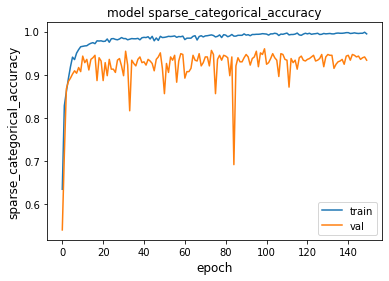

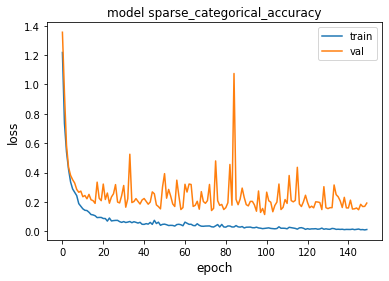

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##2 - Hfawaz CNN 3 layers, adding L2 regularization

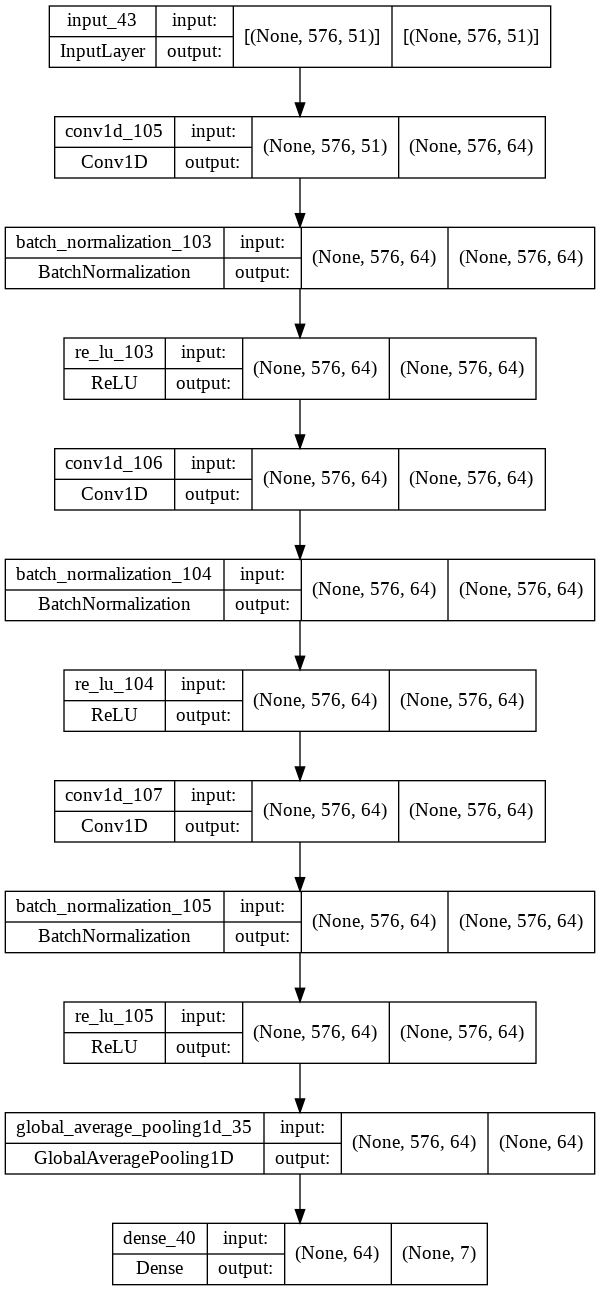

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model5.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500


KeyboardInterrupt: ignored

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##3 - Hfawaz CNN 3 layers, adding dropout BEST for 3 layers

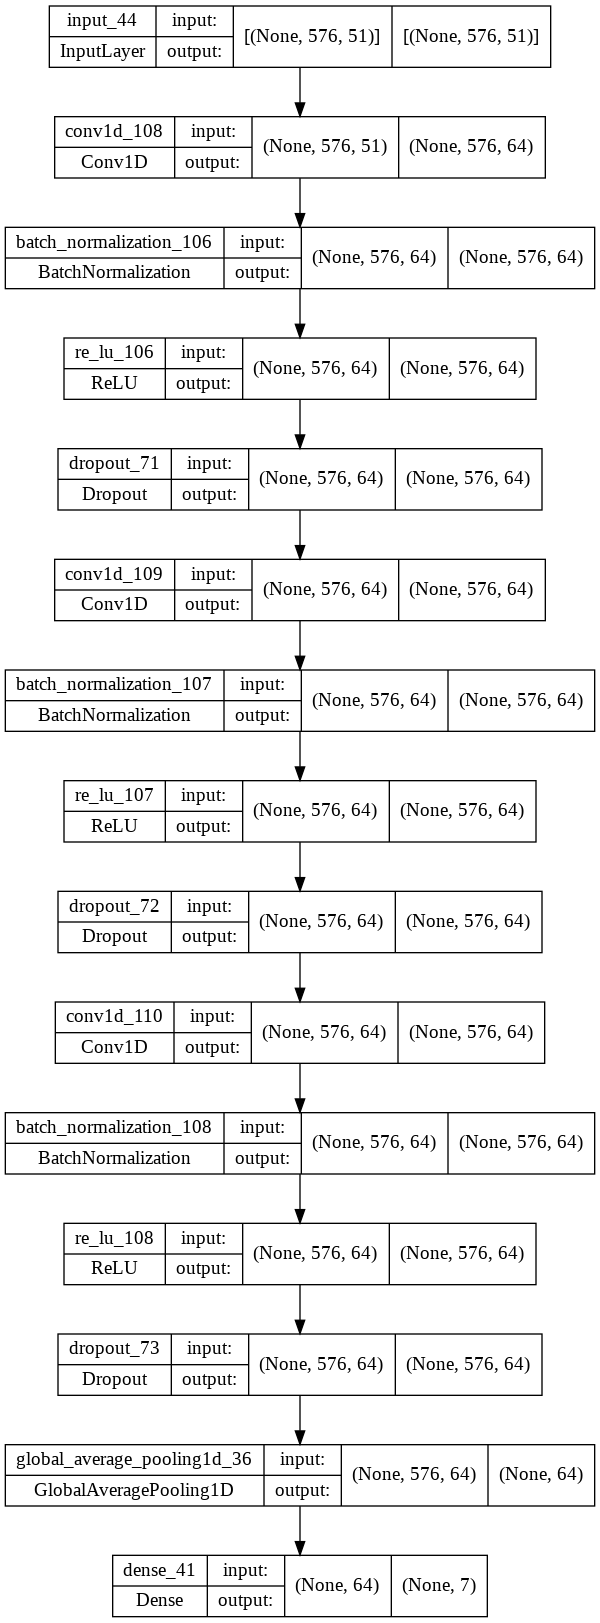

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model6.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

KeyboardInterrupt: ignored

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##4 - Hfawaz CNN 3 layers, MaxPooling1D instead of dropout

In [51]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.MaxPooling1D(2)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.MaxPooling1D(2)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.MaxPooling1D(2)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

NameError: ignored

In [52]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model7.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

NameError: ignored

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##5 - Hfawaz CNN 3 layers, removing one dropout

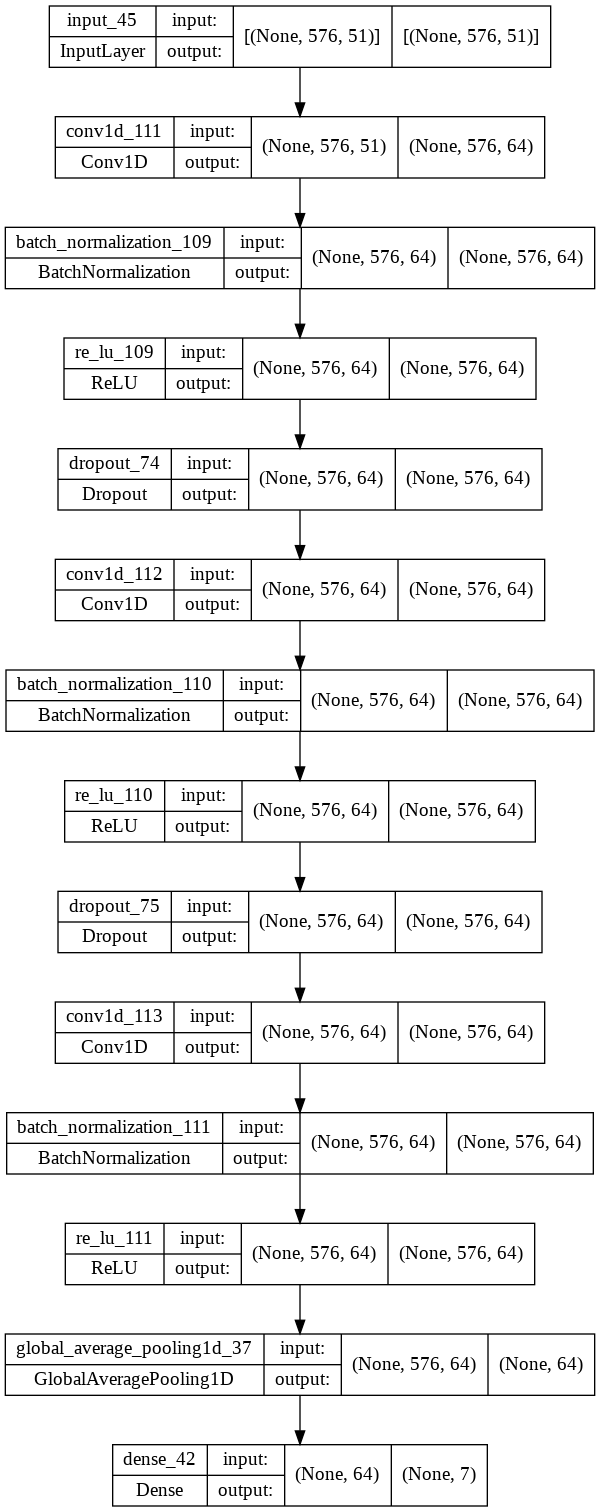

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model8.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500


KeyboardInterrupt: ignored

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##6 - Hfawaz CNN 3 layers, 2 dropout 1 maxpooling

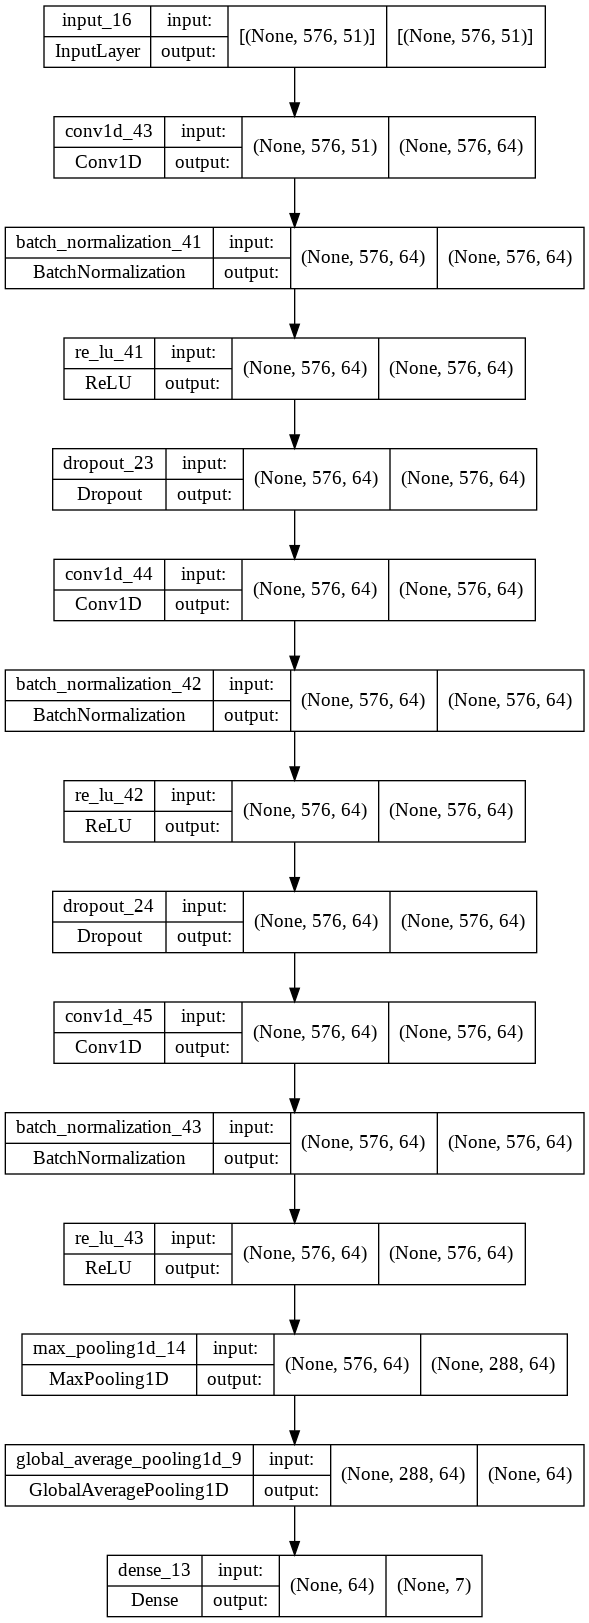

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.MaxPooling1D(2)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model9.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 12ms/step - loss: 1.4896 - sparse_categorical_accuracy: 0.5289 - val_loss: 1.4920 - val_sparse_categorical_accuracy: 0.5852 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 8ms/step - loss: 0.9838 - sparse_categorical_accuracy: 0.8033 - val_loss: 1.0876 - val_sparse_categorical_accuracy: 0.6818 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 8ms/step - loss: 0.7830 - sparse_categorical_accuracy: 0.8403 - val_loss: 0.8917 - val_sparse_categorical_accuracy: 0.8295 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 8ms/step - loss: 0.6516 - sparse_categorical_accuracy: 0.8640 - val_loss: 0.8831 - val_sparse_categorical_accuracy: 0.7689 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 8ms/step - loss: 0.5600 - sparse_categorical_accuracy: 0.8711 - val_loss: 0.8506 - val_sparse_categorical_accuracy: 0.7254 - lr: 0.0010
Epoch 6/500
66/66 [====================

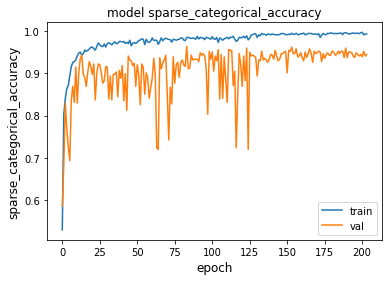

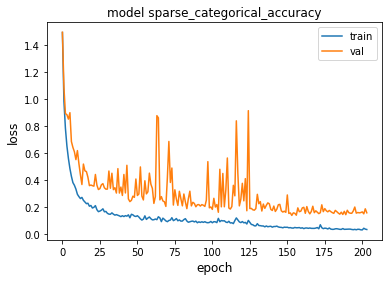

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##7 - Hfawaz CNN 3 layers, 2 dropout 1 maxpooling (bigger pooler size)

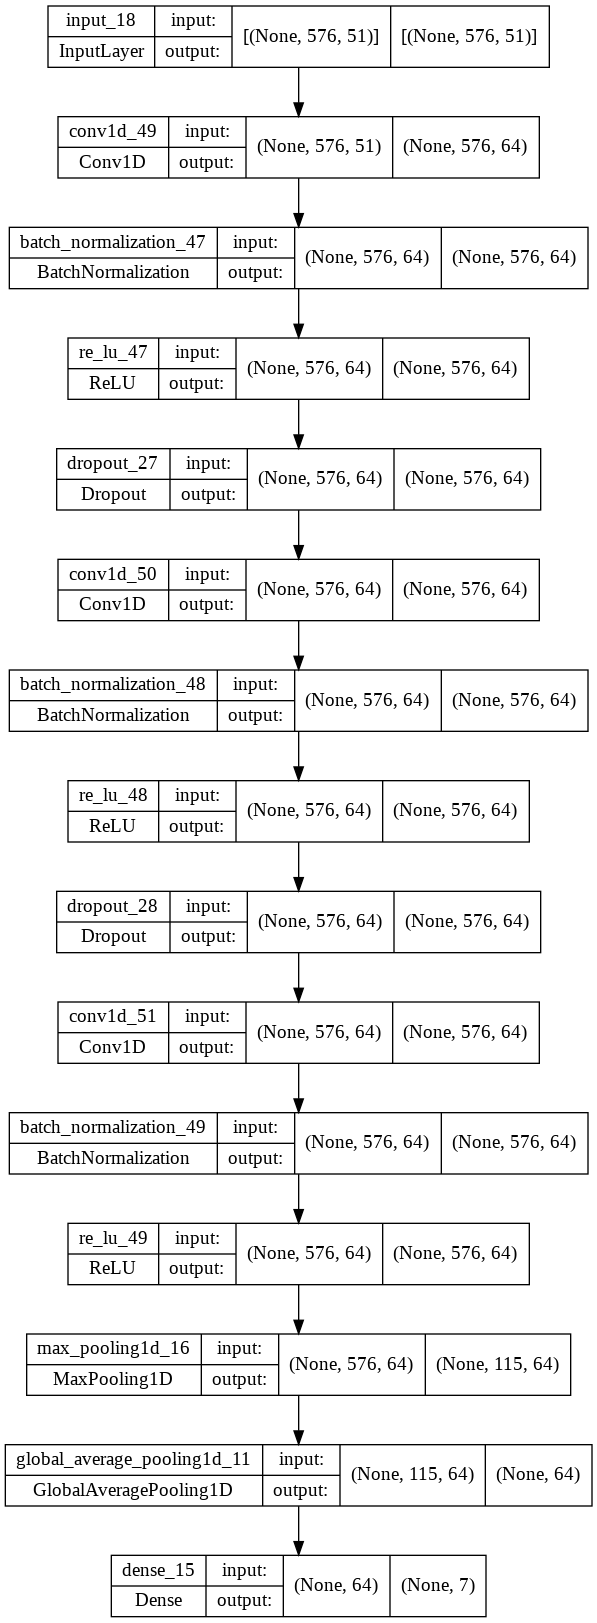

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.MaxPooling1D(5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model10.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 12ms/step - loss: 1.4684 - sparse_categorical_accuracy: 0.5365 - val_loss: 1.5467 - val_sparse_categorical_accuracy: 0.4413 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 8ms/step - loss: 0.9892 - sparse_categorical_accuracy: 0.7791 - val_loss: 1.2287 - val_sparse_categorical_accuracy: 0.5246 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 8ms/step - loss: 0.7853 - sparse_categorical_accuracy: 0.8351 - val_loss: 1.0566 - val_sparse_categorical_accuracy: 0.6913 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 8ms/step - loss: 0.6506 - sparse_categorical_accuracy: 0.8588 - val_loss: 1.0352 - val_sparse_categorical_accuracy: 0.6875 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 8ms/step - loss: 0.5796 - sparse_categorical_accuracy: 0.8801 - val_loss: 0.9620 - val_sparse_categorical_accuracy: 0.6932 - lr: 0.0010
Epoch 6/500
66/66 [====================

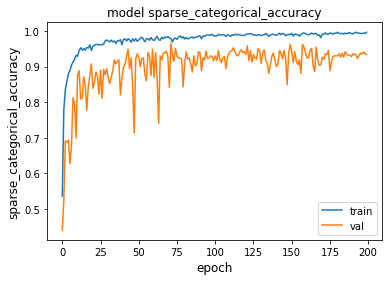

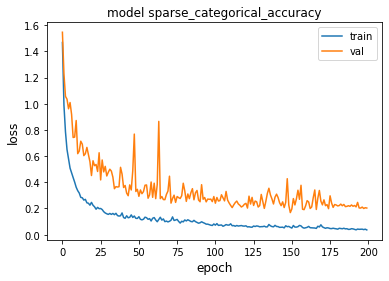

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##8 - Hfawaz CNN 2 layers

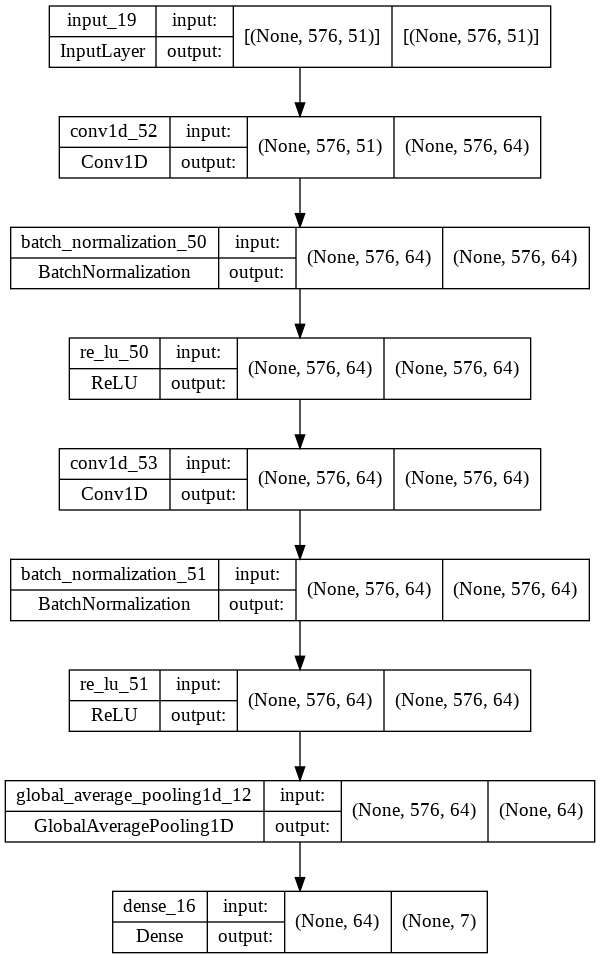

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model11.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 1s 10ms/step - loss: 1.4550 - sparse_categorical_accuracy: 0.5412 - val_loss: 1.5526 - val_sparse_categorical_accuracy: 0.5360 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 6ms/step - loss: 1.0271 - sparse_categorical_accuracy: 0.7431 - val_loss: 1.0899 - val_sparse_categorical_accuracy: 0.6970 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 0.7860 - sparse_categorical_accuracy: 0.8284 - val_loss: 0.8570 - val_sparse_categorical_accuracy: 0.8068 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 6ms/step - loss: 0.6317 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.7592 - val_sparse_categorical_accuracy: 0.8447 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 6ms/step - loss: 0.5330 - sparse_categorical_accuracy: 0.8872 - val_loss: 0.6635 - val_sparse_categorical_accuracy: 0.8561 - lr: 0.0010
Epoch 6/500
66/66 [====================

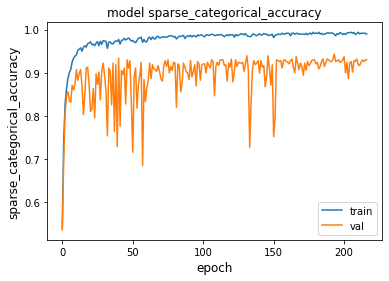

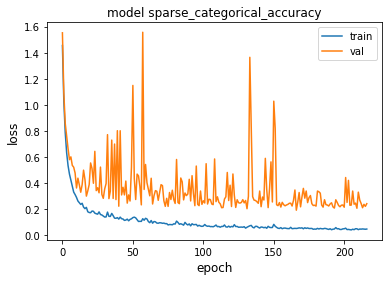

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##9 - Hfawaz CNN 2 layers, 1 dropout 

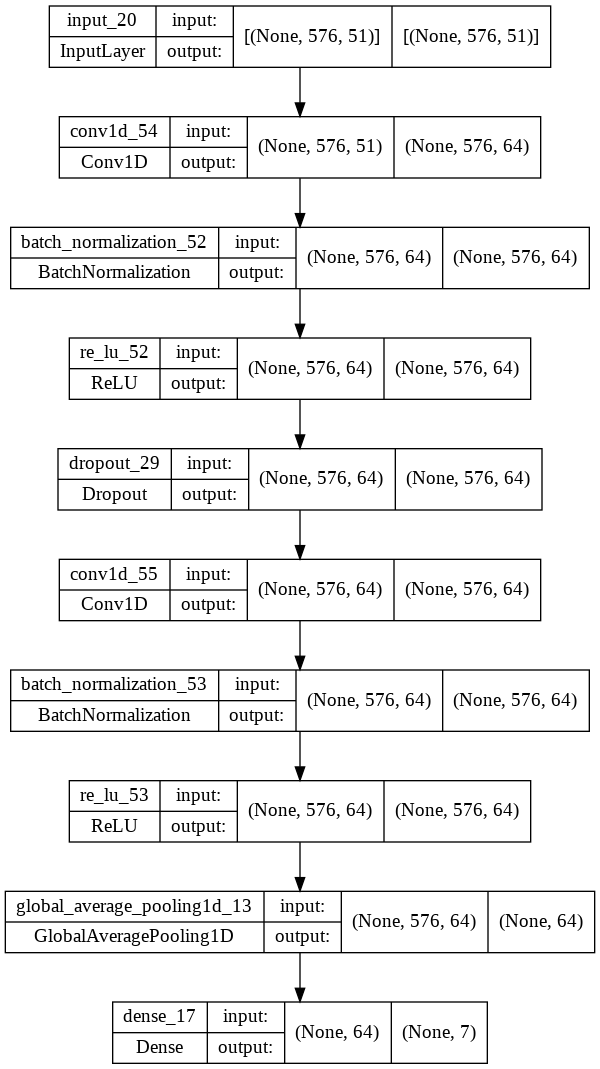

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model12.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 10ms/step - loss: 1.4974 - sparse_categorical_accuracy: 0.4976 - val_loss: 1.6346 - val_sparse_categorical_accuracy: 0.4867 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.0851 - sparse_categorical_accuracy: 0.7265 - val_loss: 1.1142 - val_sparse_categorical_accuracy: 0.6591 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 0.8626 - sparse_categorical_accuracy: 0.8081 - val_loss: 0.8496 - val_sparse_categorical_accuracy: 0.8277 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 6ms/step - loss: 0.7018 - sparse_categorical_accuracy: 0.8493 - val_loss: 0.7503 - val_sparse_categorical_accuracy: 0.8542 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 6ms/step - loss: 0.5970 - sparse_categorical_accuracy: 0.8664 - val_loss: 0.6918 - val_sparse_categorical_accuracy: 0.8258 - lr: 0.0010
Epoch 6/500
66/66 [====================

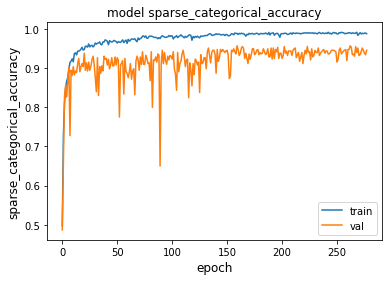

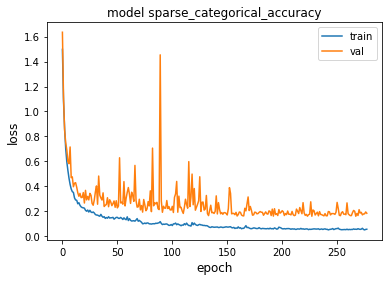

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##10 - Hfawaz CNN 2 layers, 2 dropout BEST

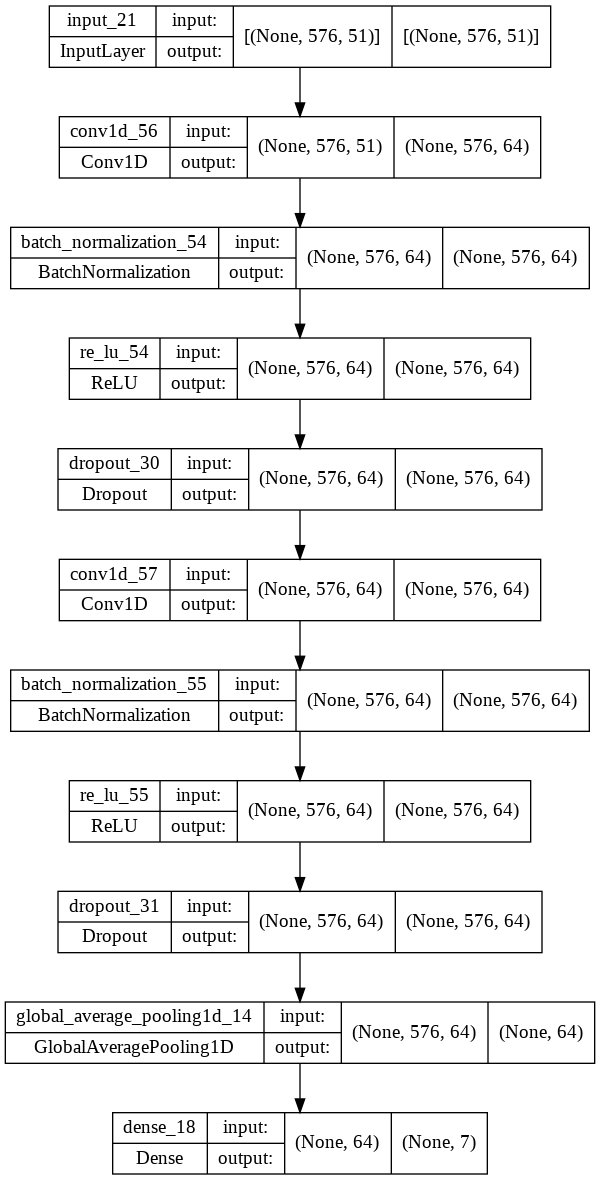

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model13.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 1s 10ms/step - loss: 1.5384 - sparse_categorical_accuracy: 0.4796 - val_loss: 1.6152 - val_sparse_categorical_accuracy: 0.3996 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.1305 - sparse_categorical_accuracy: 0.7114 - val_loss: 1.1394 - val_sparse_categorical_accuracy: 0.6364 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 0.9031 - sparse_categorical_accuracy: 0.8043 - val_loss: 0.8805 - val_sparse_categorical_accuracy: 0.7614 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.7386 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.7512 - val_sparse_categorical_accuracy: 0.8504 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 6ms/step - loss: 0.6316 - sparse_categorical_accuracy: 0.8536 - val_loss: 0.7018 - val_sparse_categorical_accuracy: 0.8542 - lr: 0.0010
Epoch 6/500
66/66 [====================

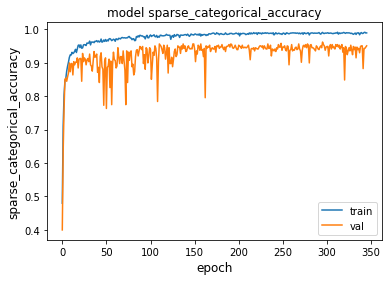

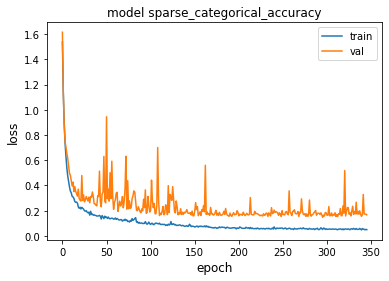

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##11 - Hfawaz CNN 2 layers, 1 maxpooling

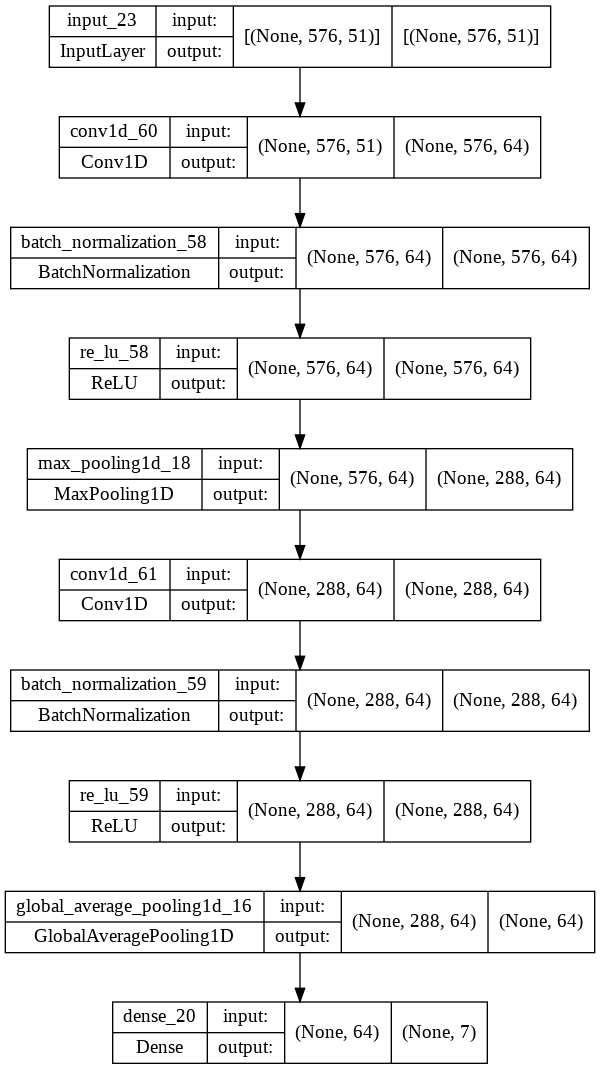

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.MaxPooling1D(2)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model14.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 1s 10ms/step - loss: 1.4397 - sparse_categorical_accuracy: 0.5379 - val_loss: 1.5107 - val_sparse_categorical_accuracy: 0.4583 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.0160 - sparse_categorical_accuracy: 0.7559 - val_loss: 1.0394 - val_sparse_categorical_accuracy: 0.6932 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 7ms/step - loss: 0.7872 - sparse_categorical_accuracy: 0.8242 - val_loss: 0.8605 - val_sparse_categorical_accuracy: 0.7500 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.6278 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.6913 - val_sparse_categorical_accuracy: 0.8428 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 7ms/step - loss: 0.5216 - sparse_categorical_accuracy: 0.8891 - val_loss: 0.6383 - val_sparse_categorical_accuracy: 0.8731 - lr: 0.0010
Epoch 6/500
66/66 [====================

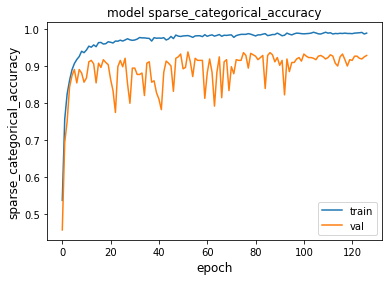

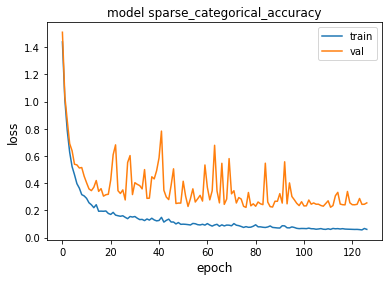

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##12 - Hfawaz CNN 2 layers, 2 maxpooling

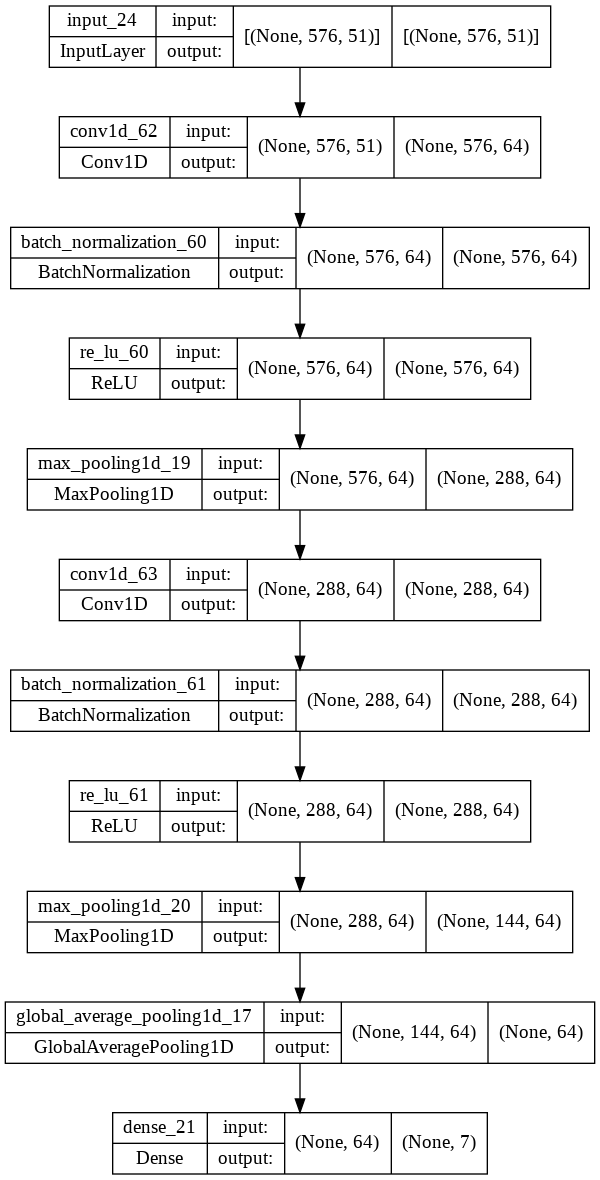

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.MaxPooling1D(2)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.MaxPooling1D(2)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model15.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 1s 10ms/step - loss: 1.4865 - sparse_categorical_accuracy: 0.5128 - val_loss: 1.5832 - val_sparse_categorical_accuracy: 0.4830 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.0109 - sparse_categorical_accuracy: 0.7682 - val_loss: 1.0597 - val_sparse_categorical_accuracy: 0.7500 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 7ms/step - loss: 0.7786 - sparse_categorical_accuracy: 0.8194 - val_loss: 0.8458 - val_sparse_categorical_accuracy: 0.8239 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.6335 - sparse_categorical_accuracy: 0.8569 - val_loss: 0.7433 - val_sparse_categorical_accuracy: 0.8542 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 7ms/step - loss: 0.5431 - sparse_categorical_accuracy: 0.8758 - val_loss: 0.6540 - val_sparse_categorical_accuracy: 0.8580 - lr: 0.0010
Epoch 6/500
66/66 [====================

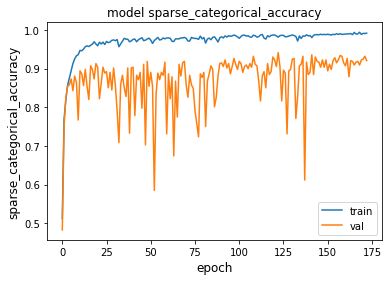

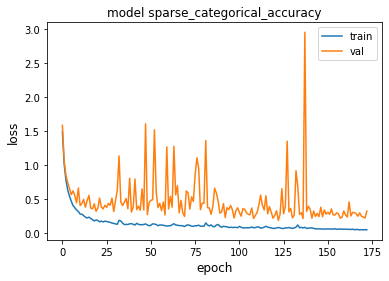

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##13 - Hfawaz CNN 2 layers, 1 maxpooling 1 dropout

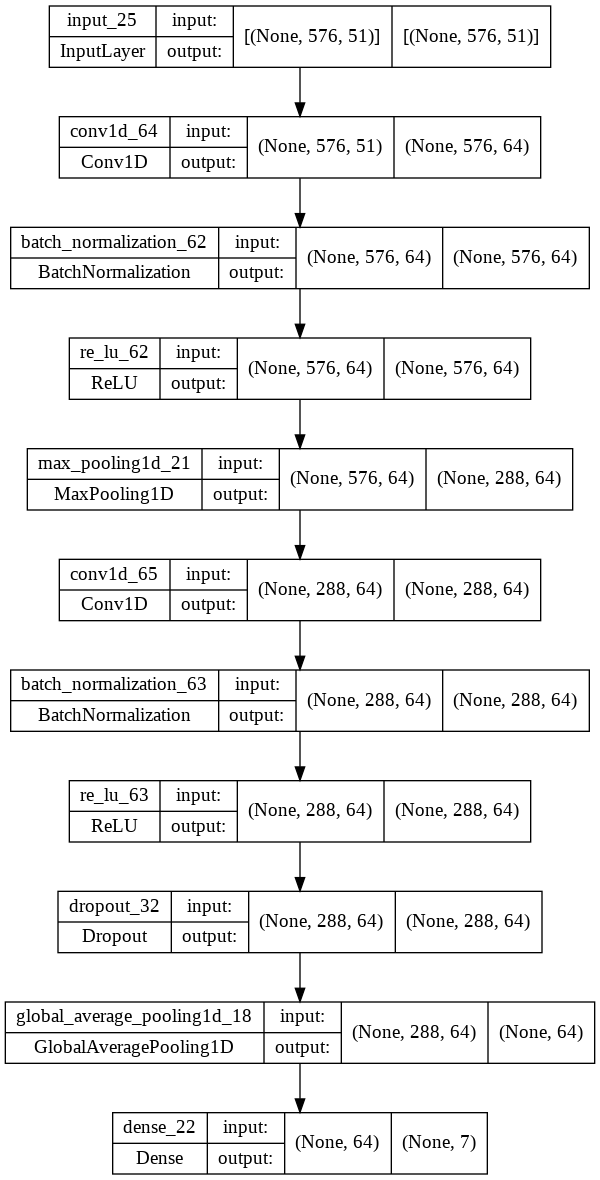

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.MaxPooling1D(2)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model16.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 10ms/step - loss: 1.4682 - sparse_categorical_accuracy: 0.4967 - val_loss: 1.4707 - val_sparse_categorical_accuracy: 0.5038 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 6ms/step - loss: 1.0207 - sparse_categorical_accuracy: 0.7545 - val_loss: 1.0352 - val_sparse_categorical_accuracy: 0.7254 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 7ms/step - loss: 0.7920 - sparse_categorical_accuracy: 0.8289 - val_loss: 0.8048 - val_sparse_categorical_accuracy: 0.7936 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.6355 - sparse_categorical_accuracy: 0.8706 - val_loss: 0.6894 - val_sparse_categorical_accuracy: 0.8617 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 7ms/step - loss: 0.5405 - sparse_categorical_accuracy: 0.8915 - val_loss: 0.5953 - val_sparse_categorical_accuracy: 0.8674 - lr: 0.0010
Epoch 6/500
66/66 [====================

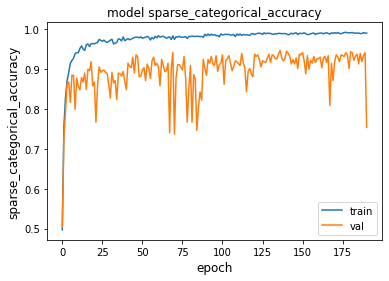

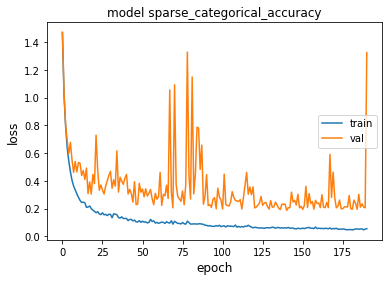

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##14 - Hfawaz CNN 2 layers, 1 dropout 1 maxpooling 

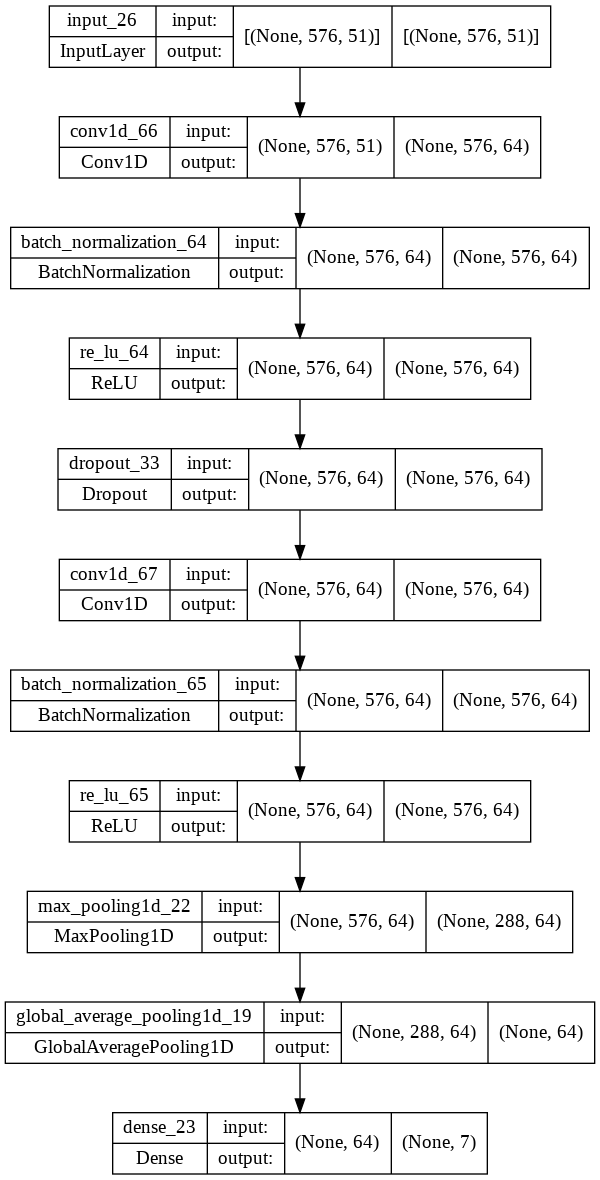

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)
  

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.MaxPooling1D(2)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model17.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 10ms/step - loss: 1.5378 - sparse_categorical_accuracy: 0.5185 - val_loss: 1.5998 - val_sparse_categorical_accuracy: 0.3807 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.1285 - sparse_categorical_accuracy: 0.7118 - val_loss: 1.1626 - val_sparse_categorical_accuracy: 0.6856 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 7ms/step - loss: 0.9114 - sparse_categorical_accuracy: 0.7938 - val_loss: 0.9492 - val_sparse_categorical_accuracy: 0.8277 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.7390 - sparse_categorical_accuracy: 0.8398 - val_loss: 0.8711 - val_sparse_categorical_accuracy: 0.8239 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 7ms/step - loss: 0.6471 - sparse_categorical_accuracy: 0.8498 - val_loss: 0.7937 - val_sparse_categorical_accuracy: 0.8087 - lr: 0.0010
Epoch 6/500
66/66 [====================

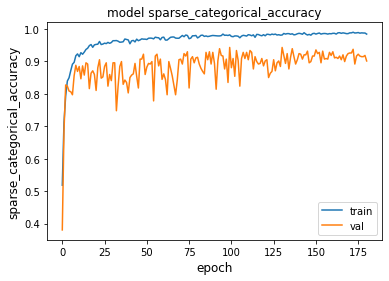

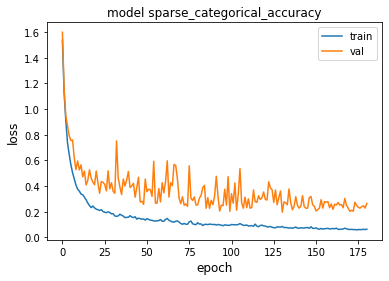

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##15 - Hfawaz CNN 2 layers, 2 dropout, l1 regularizers

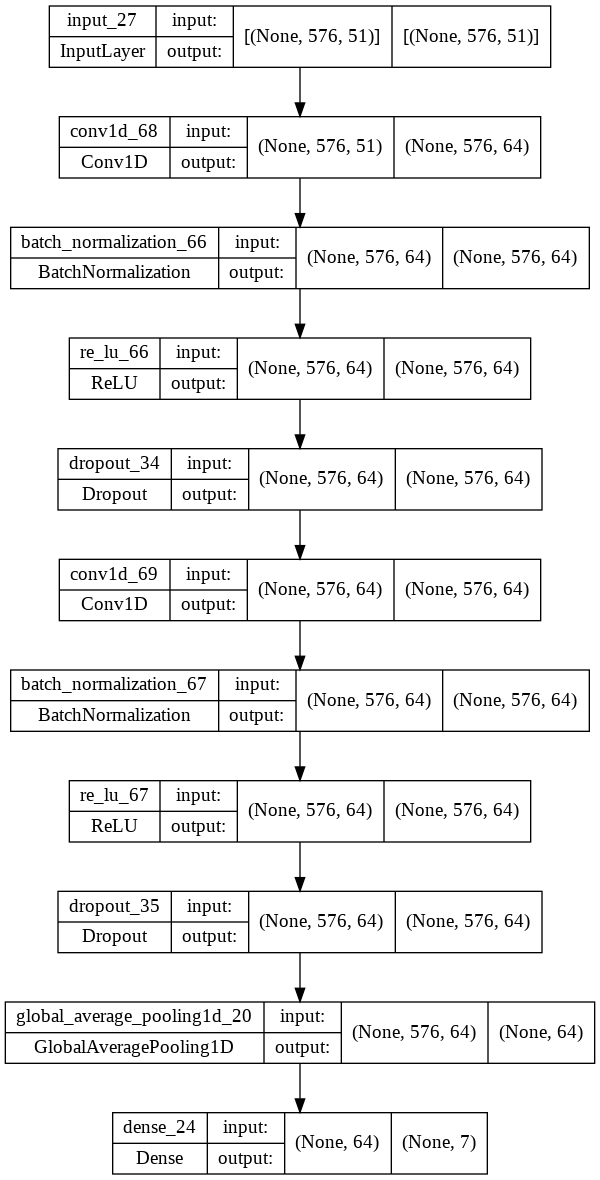

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1(0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1(0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model18.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 10ms/step - loss: 2.5533 - sparse_categorical_accuracy: 0.4806 - val_loss: 2.3486 - val_sparse_categorical_accuracy: 0.3466 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.7115 - sparse_categorical_accuracy: 0.6929 - val_loss: 1.7416 - val_sparse_categorical_accuracy: 0.6250 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 1.1853 - sparse_categorical_accuracy: 0.7938 - val_loss: 1.7978 - val_sparse_categorical_accuracy: 0.3125 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 6ms/step - loss: 0.8781 - sparse_categorical_accuracy: 0.8427 - val_loss: 2.0483 - val_sparse_categorical_accuracy: 0.2727 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 6ms/step - loss: 0.7245 - sparse_categorical_accuracy: 0.8592 - val_loss: 1.9091 - val_sparse_categorical_accuracy: 0.2841 - lr: 0.0010
Epoch 6/500
66/66 [====================

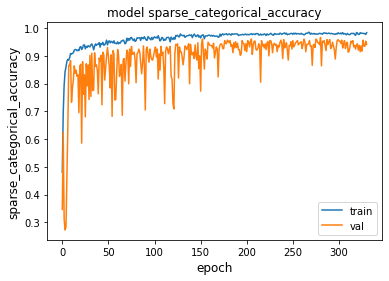

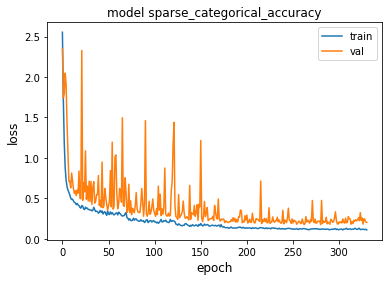

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##16 - Hfawaz CNN 2 layers, 2 dropout, l1_l2 regularizers

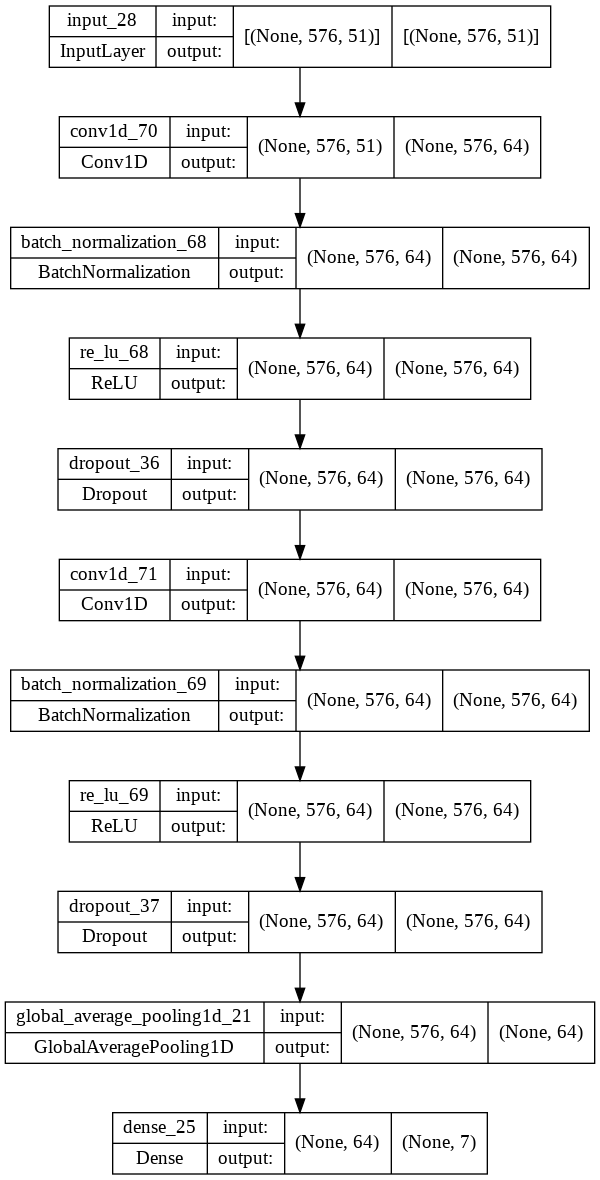

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model19.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 10ms/step - loss: 2.7014 - sparse_categorical_accuracy: 0.4616 - val_loss: 2.4017 - val_sparse_categorical_accuracy: 0.3712 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.7244 - sparse_categorical_accuracy: 0.6882 - val_loss: 1.8043 - val_sparse_categorical_accuracy: 0.5341 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 1.1340 - sparse_categorical_accuracy: 0.8043 - val_loss: 2.0642 - val_sparse_categorical_accuracy: 0.2424 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 6ms/step - loss: 0.8529 - sparse_categorical_accuracy: 0.8460 - val_loss: 2.0441 - val_sparse_categorical_accuracy: 0.2803 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 6ms/step - loss: 0.7057 - sparse_categorical_accuracy: 0.8616 - val_loss: 1.8847 - val_sparse_categorical_accuracy: 0.3201 - lr: 0.0010
Epoch 6/500
66/66 [====================

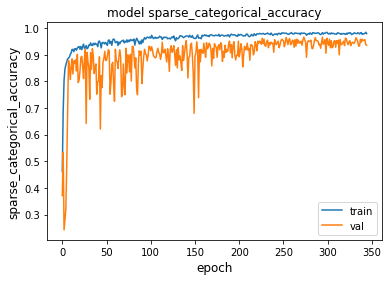

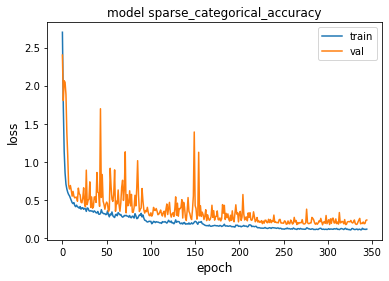

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##17 - Hfawaz CNN 2 layers, 2 dropout, l1_l2 regularizers, first filter = 128

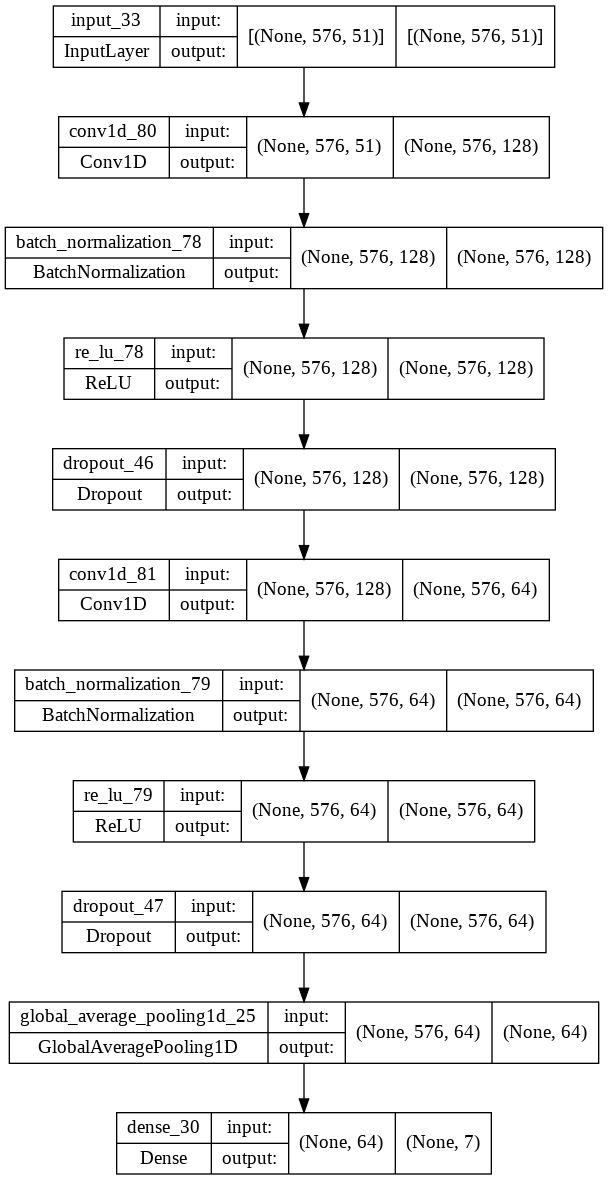

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model20.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 12ms/step - loss: 3.1336 - sparse_categorical_accuracy: 0.5445 - val_loss: 2.5364 - val_sparse_categorical_accuracy: 0.5265 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.6456 - sparse_categorical_accuracy: 0.7536 - val_loss: 2.3574 - val_sparse_categorical_accuracy: 0.2330 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 1.0193 - sparse_categorical_accuracy: 0.8251 - val_loss: 2.4259 - val_sparse_categorical_accuracy: 0.2689 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.8236 - sparse_categorical_accuracy: 0.8626 - val_loss: 2.2971 - val_sparse_categorical_accuracy: 0.2443 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 7ms/step - loss: 0.7269 - sparse_categorical_accuracy: 0.8820 - val_loss: 1.6158 - val_sparse_categorical_accuracy: 0.3371 - lr: 0.0010
Epoch 6/500
66/66 [====================

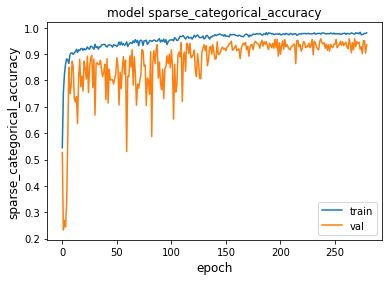

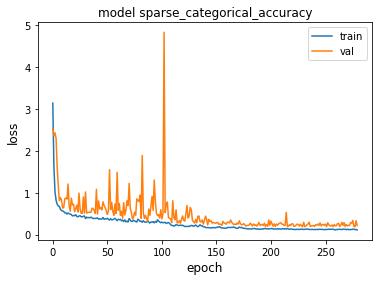

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##18 - Hfawaz CNN 2 layers, 2 dropout, l1_l2 regularizers, both filter = 128

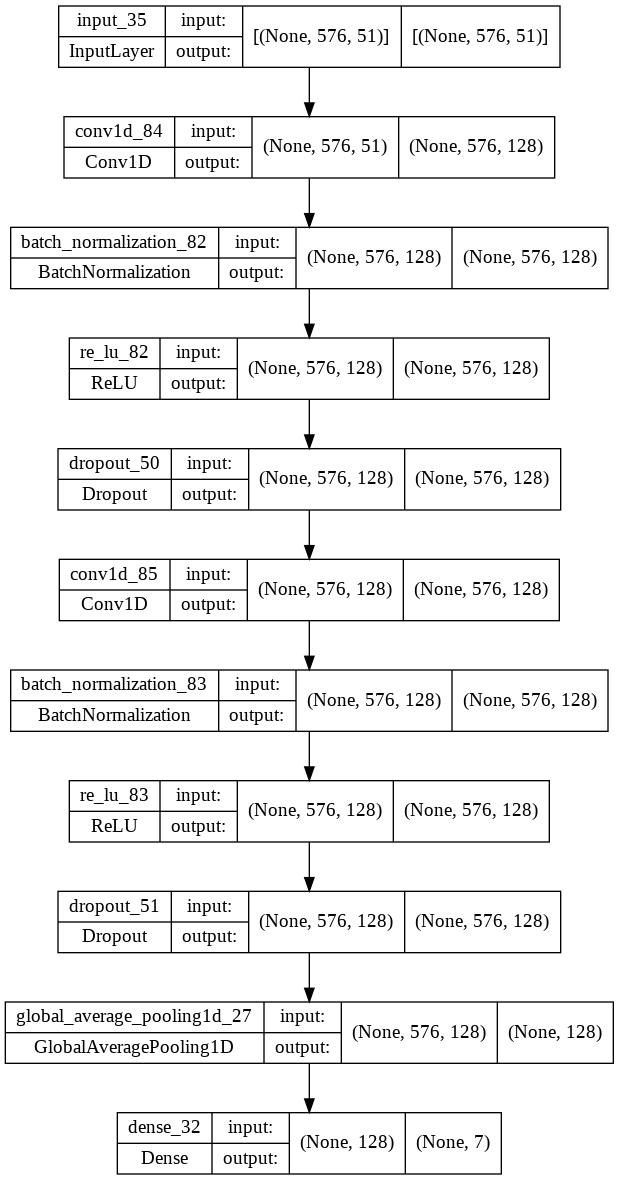

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model21.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 12ms/step - loss: 3.5801 - sparse_categorical_accuracy: 0.6185 - val_loss: 2.7076 - val_sparse_categorical_accuracy: 0.6742 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 8ms/step - loss: 1.5759 - sparse_categorical_accuracy: 0.8147 - val_loss: 2.5412 - val_sparse_categorical_accuracy: 0.2292 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 8ms/step - loss: 0.9056 - sparse_categorical_accuracy: 0.8659 - val_loss: 2.5316 - val_sparse_categorical_accuracy: 0.2481 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 8ms/step - loss: 0.7409 - sparse_categorical_accuracy: 0.8777 - val_loss: 2.3967 - val_sparse_categorical_accuracy: 0.2462 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 8ms/step - loss: 0.6728 - sparse_categorical_accuracy: 0.8962 - val_loss: 1.8708 - val_sparse_categorical_accuracy: 0.3277 - lr: 0.0010
Epoch 6/500
66/66 [====================

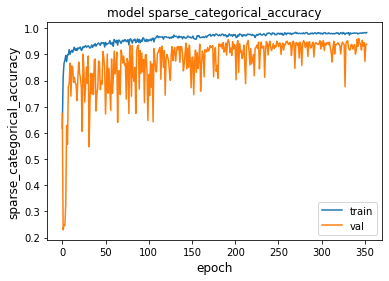

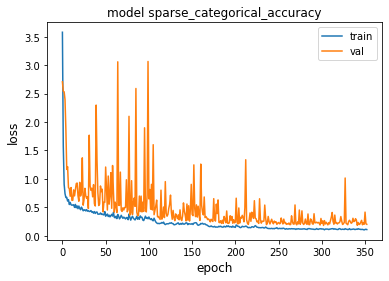

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##19 - Hfawaz CNN 2 layers, 2 dropout, l1_l2 regularizers, both filter = 128, kernel size = 6

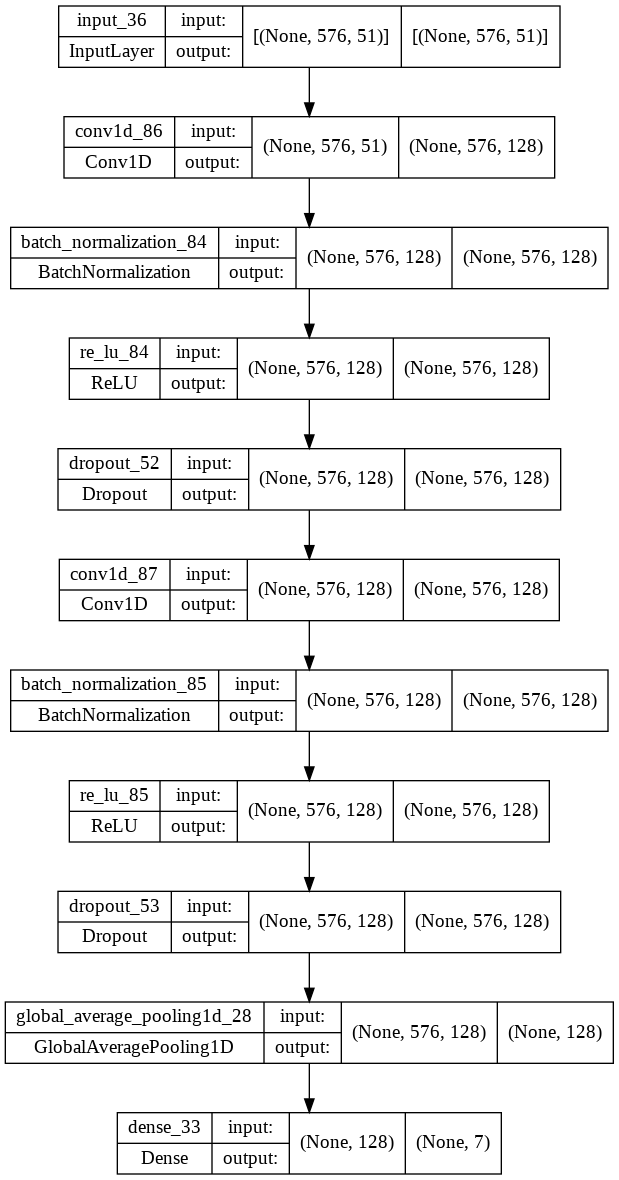

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=6, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=6, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model22.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 13ms/step - loss: 3.9274 - sparse_categorical_accuracy: 0.6104 - val_loss: 2.6528 - val_sparse_categorical_accuracy: 0.4205 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 8ms/step - loss: 1.3279 - sparse_categorical_accuracy: 0.8204 - val_loss: 2.4815 - val_sparse_categorical_accuracy: 0.2311 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 8ms/step - loss: 0.9743 - sparse_categorical_accuracy: 0.8531 - val_loss: 2.1175 - val_sparse_categorical_accuracy: 0.2348 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 8ms/step - loss: 0.8553 - sparse_categorical_accuracy: 0.8711 - val_loss: 1.8810 - val_sparse_categorical_accuracy: 0.2708 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 8ms/step - loss: 0.7861 - sparse_categorical_accuracy: 0.8829 - val_loss: 1.4397 - val_sparse_categorical_accuracy: 0.4886 - lr: 0.0010
Epoch 6/500
66/66 [====================

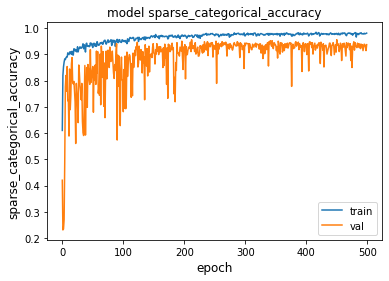

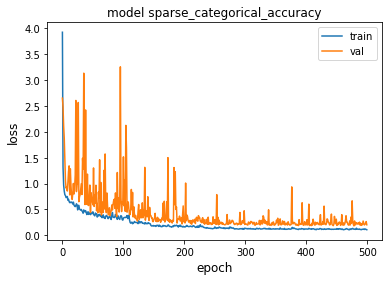

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##20 - Hfawaz CNN 2 layers, 2 dropout, l1_l2 regularizers, filter = 32

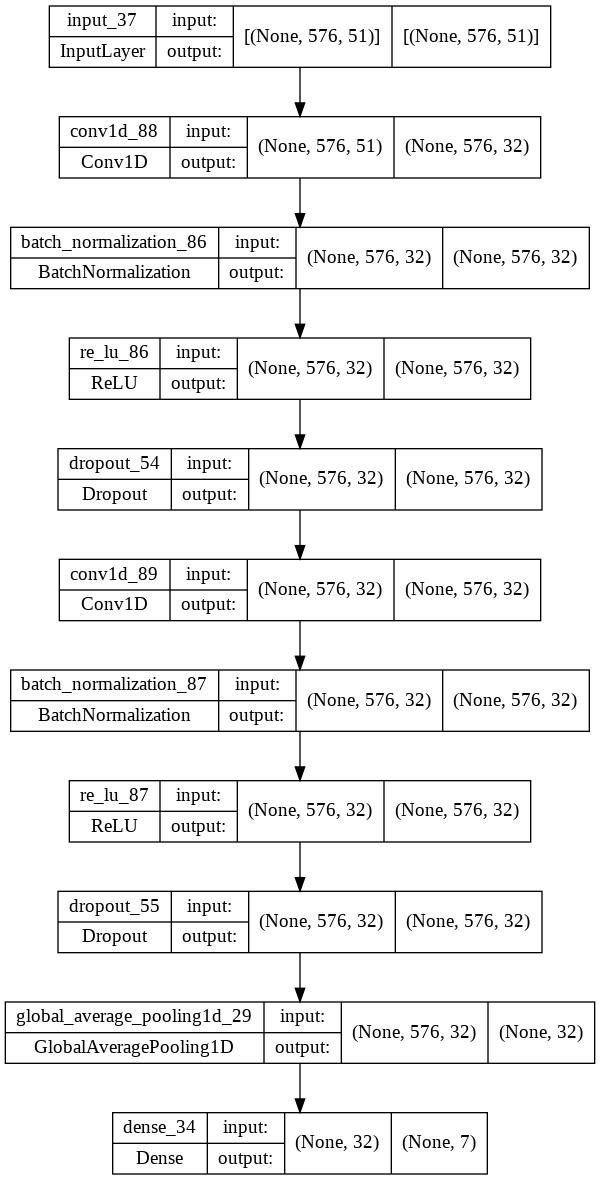

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model23.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 11ms/step - loss: 2.2355 - sparse_categorical_accuracy: 0.4166 - val_loss: 2.1043 - val_sparse_categorical_accuracy: 0.4621 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 1.7061 - sparse_categorical_accuracy: 0.5682 - val_loss: 1.6598 - val_sparse_categorical_accuracy: 0.6250 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 1.3331 - sparse_categorical_accuracy: 0.6905 - val_loss: 1.4787 - val_sparse_categorical_accuracy: 0.7008 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 6ms/step - loss: 1.0798 - sparse_categorical_accuracy: 0.7616 - val_loss: 1.5052 - val_sparse_categorical_accuracy: 0.3826 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 6ms/step - loss: 0.9158 - sparse_categorical_accuracy: 0.8142 - val_loss: 1.4684 - val_sparse_categorical_accuracy: 0.3636 - lr: 0.0010
Epoch 6/500
66/66 [====================

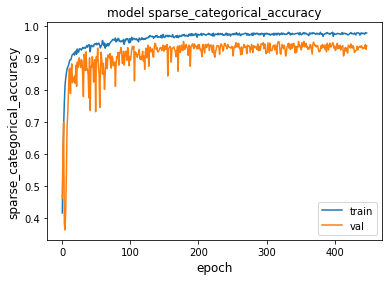

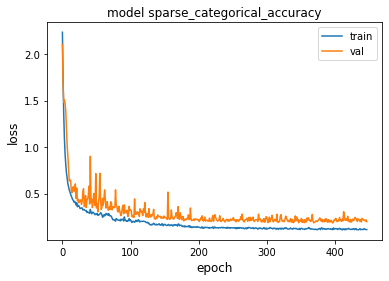

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##21 - Hfawaz CNN 3 layers, 3 dropout, l1_l2 

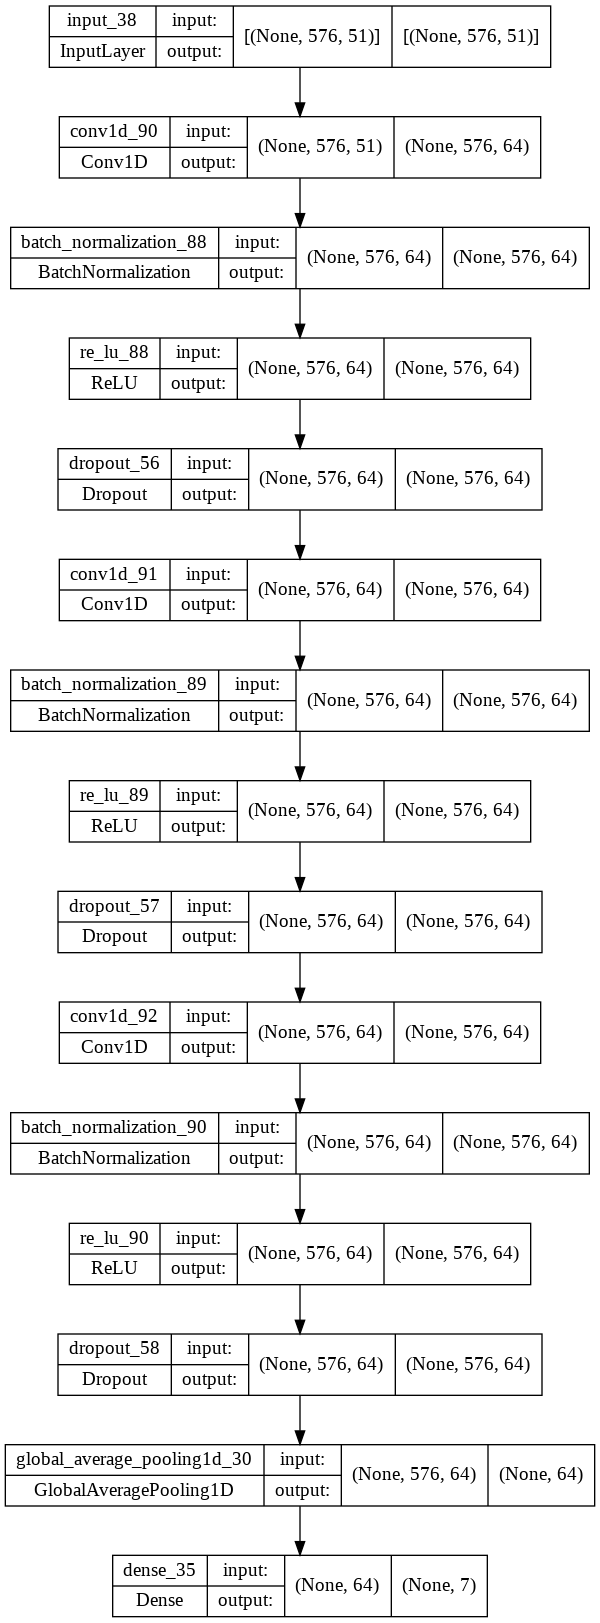

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model24.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 12ms/step - loss: 3.2611 - sparse_categorical_accuracy: 0.4791 - val_loss: 2.8112 - val_sparse_categorical_accuracy: 0.4545 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 8ms/step - loss: 1.8655 - sparse_categorical_accuracy: 0.7588 - val_loss: 2.4680 - val_sparse_categorical_accuracy: 0.2235 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 8ms/step - loss: 1.1229 - sparse_categorical_accuracy: 0.8436 - val_loss: 2.2604 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 8ms/step - loss: 0.8284 - sparse_categorical_accuracy: 0.8573 - val_loss: 1.9545 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 8ms/step - loss: 0.7072 - sparse_categorical_accuracy: 0.8626 - val_loss: 1.8935 - val_sparse_categorical_accuracy: 0.2083 - lr: 0.0010
Epoch 6/500
66/66 [====================

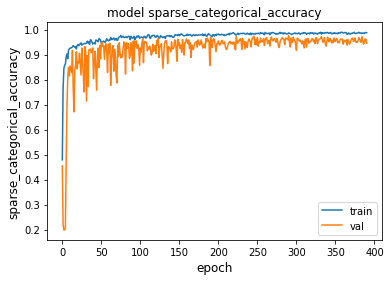

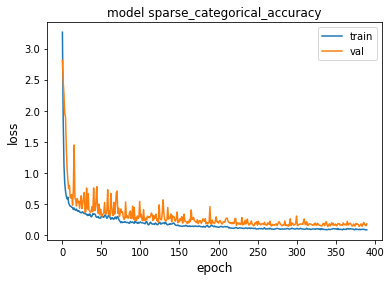

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##22 - Hfawaz CNN 3 layers, 1st filter=128,  3 dropout, l1_l2 

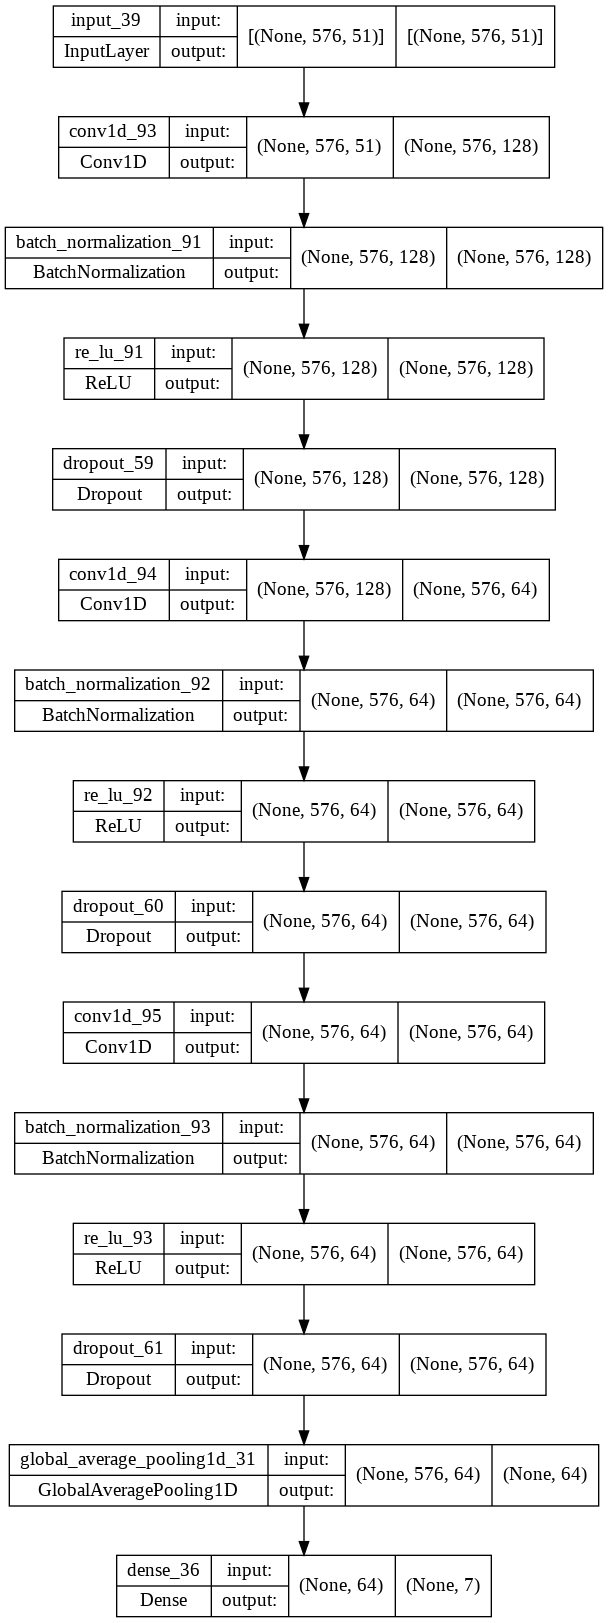

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model25.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 13ms/step - loss: 3.7785 - sparse_categorical_accuracy: 0.5280 - val_loss: 3.1099 - val_sparse_categorical_accuracy: 0.3485 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 8ms/step - loss: 1.9289 - sparse_categorical_accuracy: 0.7725 - val_loss: 2.8405 - val_sparse_categorical_accuracy: 0.2879 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 8ms/step - loss: 1.1530 - sparse_categorical_accuracy: 0.8355 - val_loss: 2.6589 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 8ms/step - loss: 0.8751 - sparse_categorical_accuracy: 0.8668 - val_loss: 2.4967 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 8ms/step - loss: 0.7575 - sparse_categorical_accuracy: 0.8820 - val_loss: 2.0223 - val_sparse_categorical_accuracy: 0.2992 - lr: 0.0010
Epoch 6/500
66/66 [====================

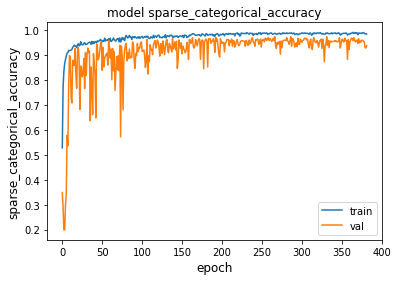

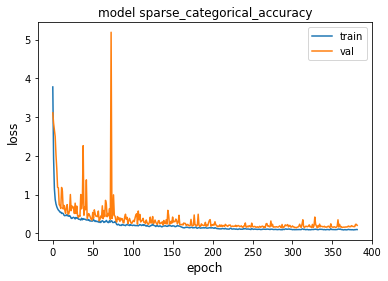

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

##23 - Hfawaz CNN 3 layers, 2 filter=128,  3 dropout, l1_l2 

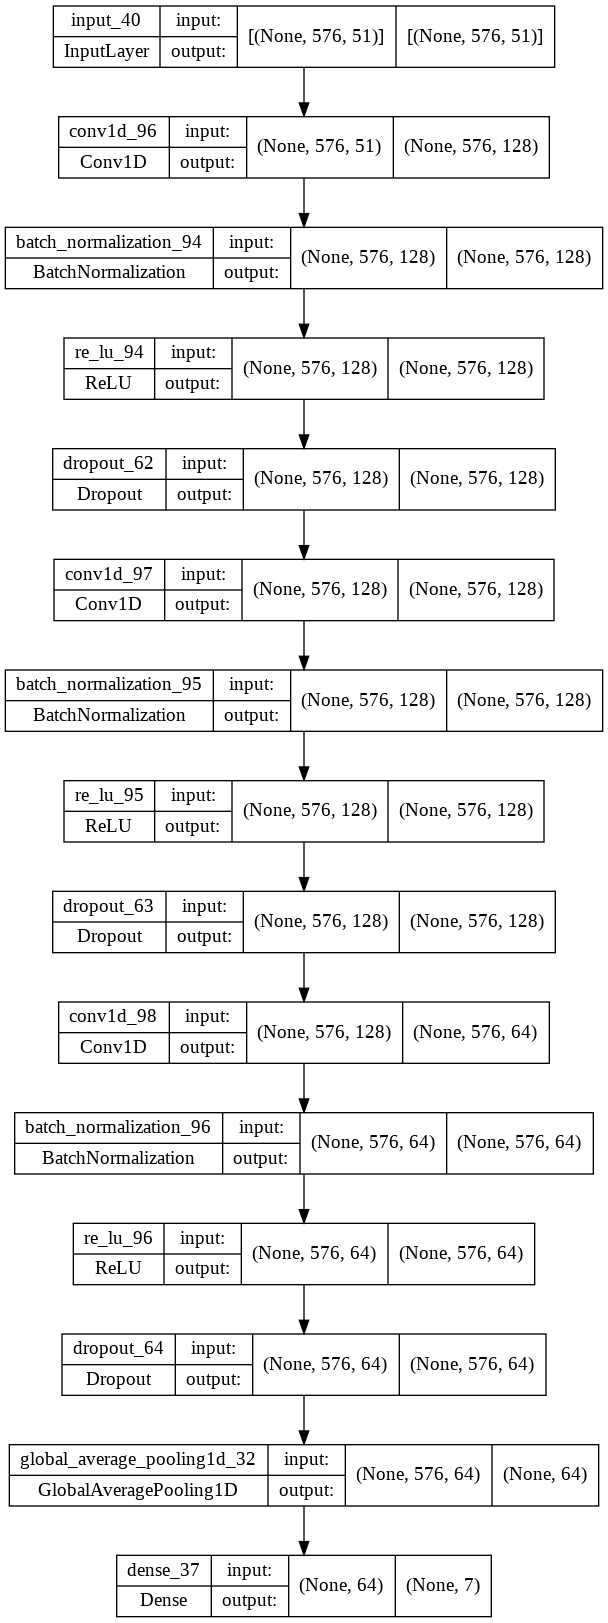

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model26.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 2s 13ms/step - loss: 4.3857 - sparse_categorical_accuracy: 0.5592 - val_loss: 3.3540 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 9ms/step - loss: 1.7834 - sparse_categorical_accuracy: 0.8114 - val_loss: 2.6693 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 9ms/step - loss: 1.0468 - sparse_categorical_accuracy: 0.8536 - val_loss: 2.5726 - val_sparse_categorical_accuracy: 0.2216 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 9ms/step - loss: 0.9028 - sparse_categorical_accuracy: 0.8526 - val_loss: 2.4433 - val_sparse_categorical_accuracy: 0.2955 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 9ms/step - loss: 0.7757 - sparse_categorical_accuracy: 0.8730 - val_loss: 2.0284 - val_sparse_categorical_accuracy: 0.2936 - lr: 0.0010
Epoch 6/500
66/66 [====================

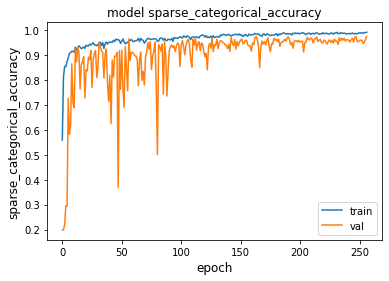

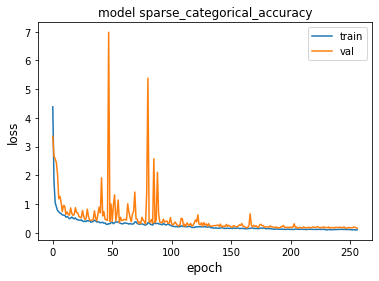

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()